**Columns explaination:**
* ***Country***: Country
* ***Year***: Year
* ***Status***: Developed or Developing status
* ***Life expectancy***: Life Expectancy in age
* ***Adult Mortality***: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* ***infant deaths***: Number of Infant Deaths per 1000 population
* ***Alcohol***: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* ***percentage expenditure***: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
* ***Hepatitis B***: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* ***Measles***: Measles - number of reported cases per 1000 population
* ***BMI***: Average Body Mass Index of entire population
* ***under-five deaths***: Number of under-five deaths per 1000 population
* ***Polio***: Polio (Pol3) immunization coverage among 1-year-olds (%)
* ***Total expenditure***: General government expenditure on health as a percentage of total government expenditure (%)
* ***Diphtheria***: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* ***HIV/AIDS***: Deaths per 1 000 live births HIV/AIDS (0-4 years)
* ***GDP***: Gross Domestic Product per capita (in USD)
* ***Population***: Population of the country
* ***thinness 1-19 years***: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
* ***thinness 5-9 years***: Prevalence of thinness among children for Age 5 to 9(%)
* ***Income composition of resources***: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* ***Schooling***: Number of years of Schooling(years)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Life Expectancy Data.csv to Life Expectancy Data.csv


# Reading data

In [3]:
df = pd.read_csv(r"Life Expectancy Data.csv")

In [4]:
df.shape

(2938, 22)

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

* **Got some insights like there are some Null values, and Outliers.**

In [9]:
df.columns=df.columns.str.strip()

# EDA

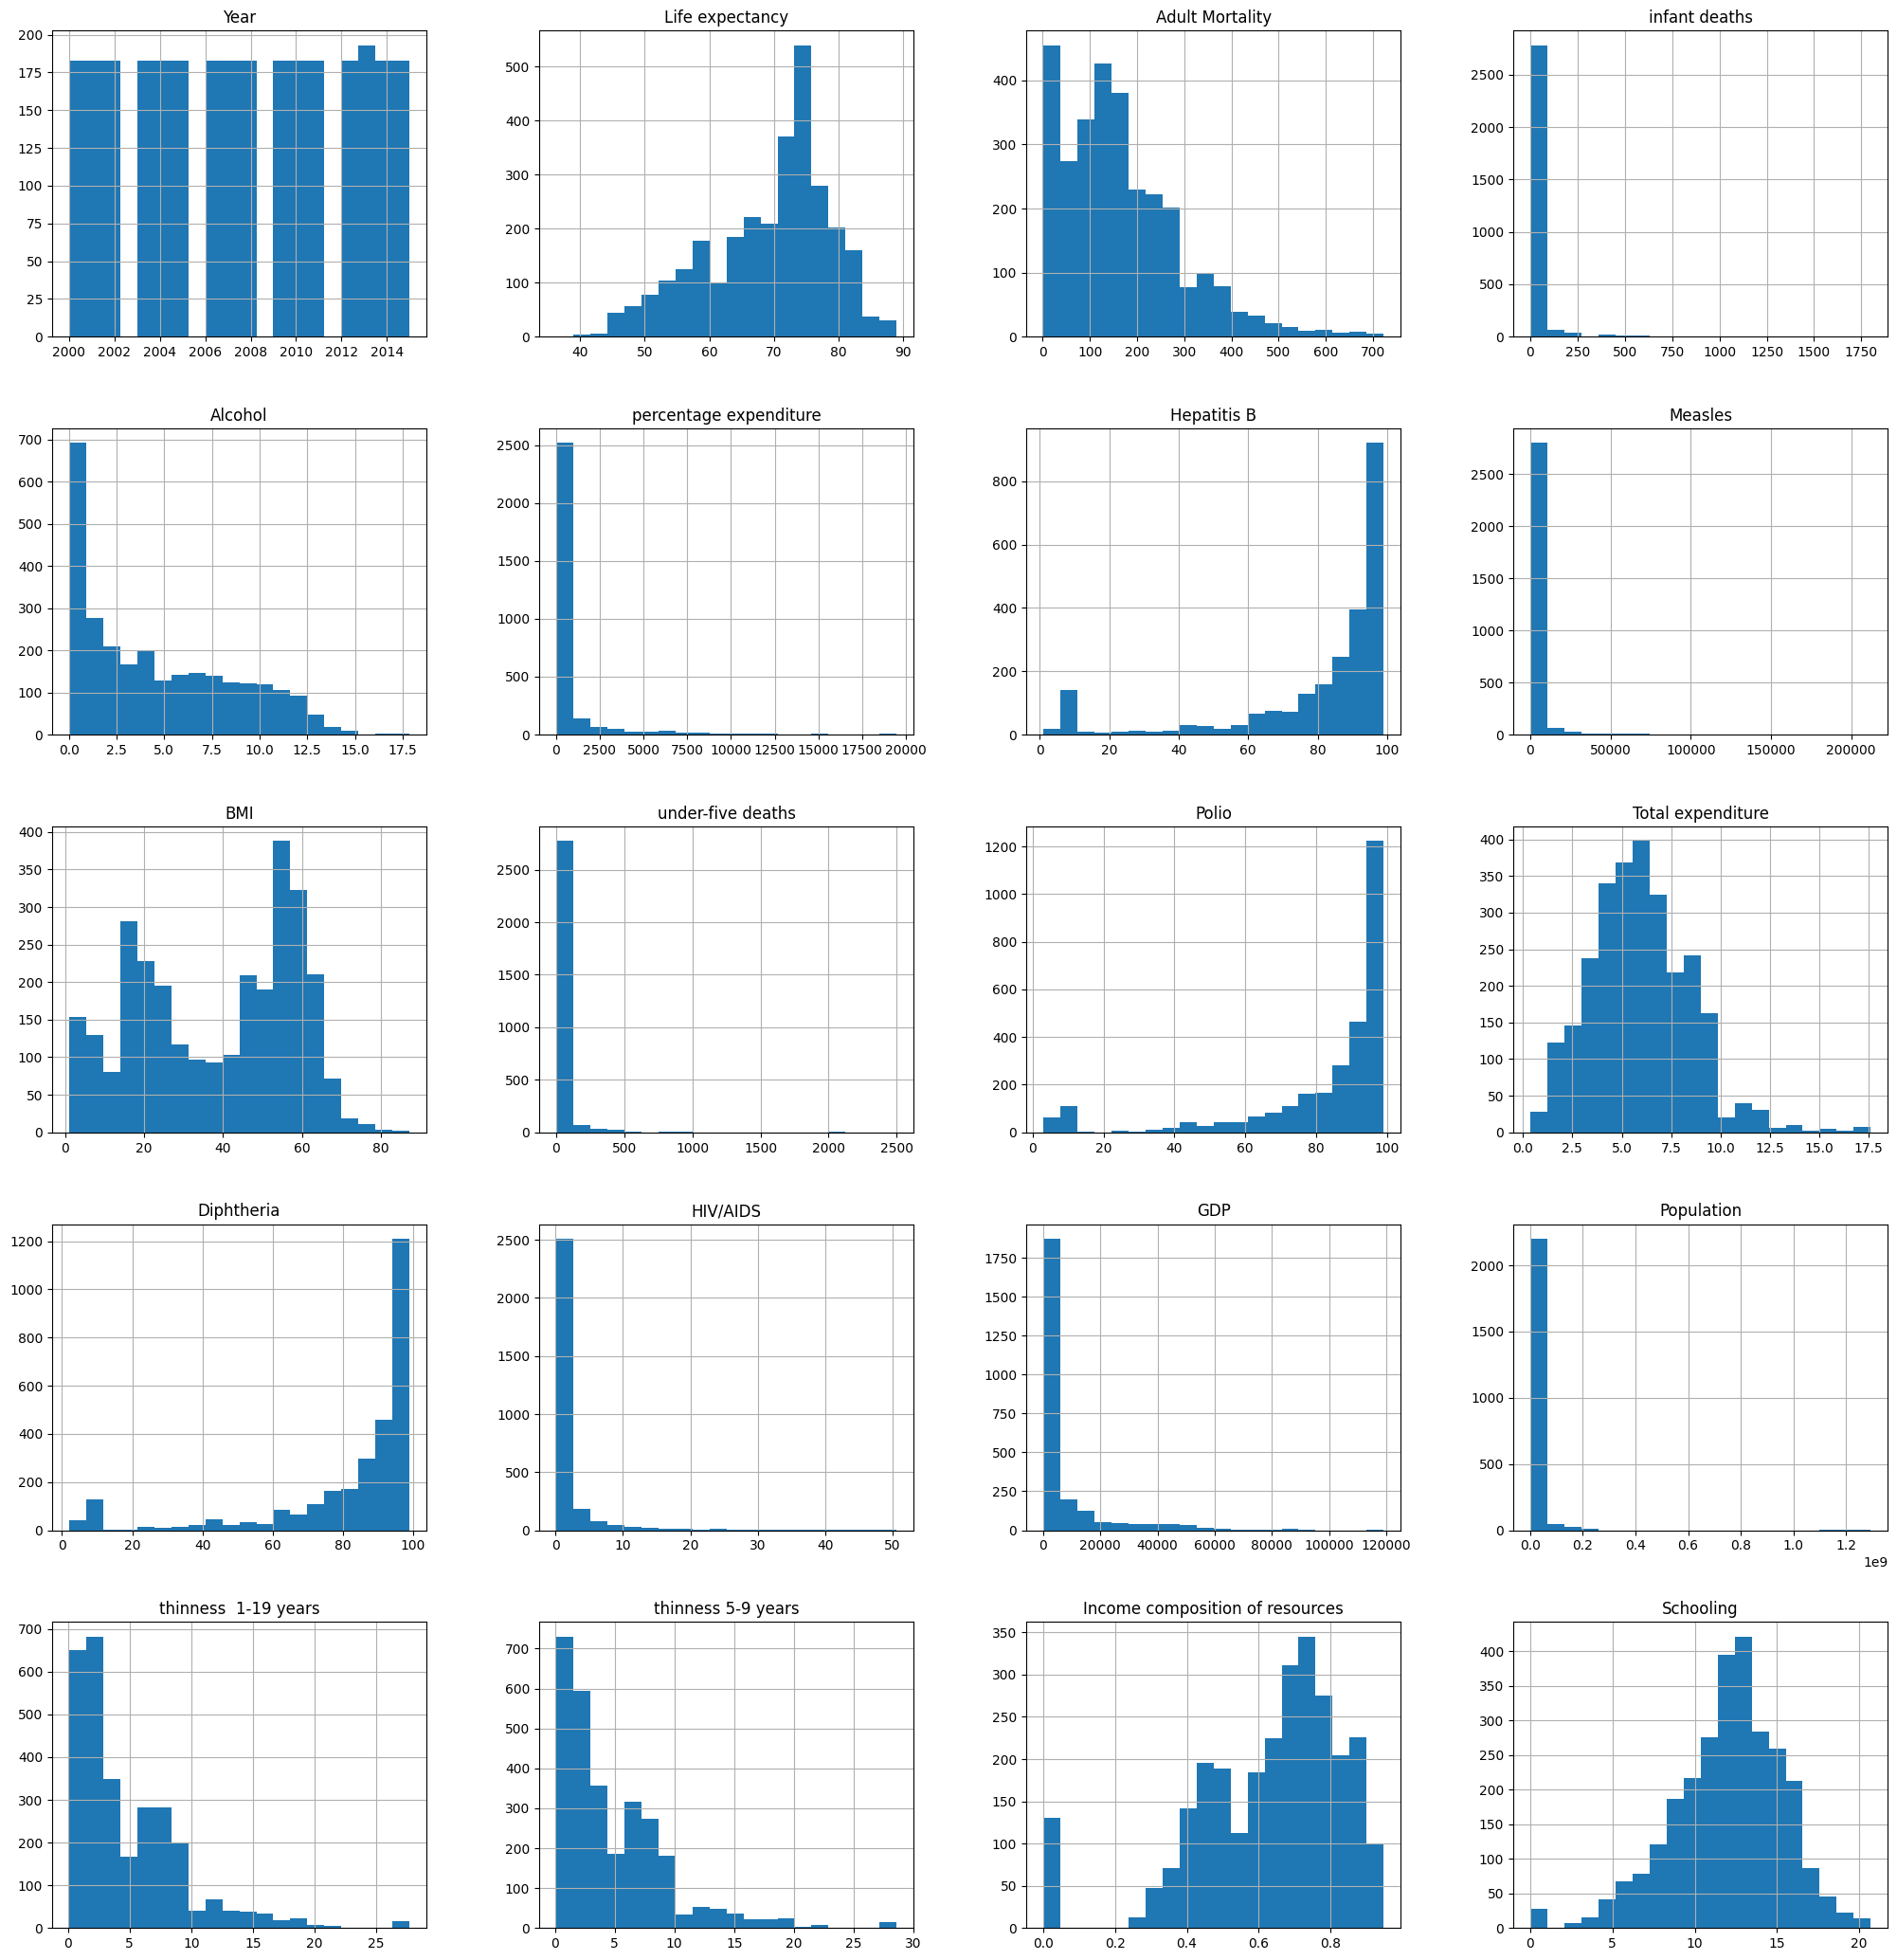

In [10]:
df.hist(bins=20, figsize=(25,26))
plt.show()
# exploring the distribution of the features

# Train test split

In [11]:
X = df.drop(columns = ['Life expectancy'])
y = df['Life expectancy']
# Splitting the target column from the data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_trian,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
group_by_year = X_train.groupby(["Year"])
# Trying to time analysis the data

In [14]:
num_cols = X_train.select_dtypes(include= np.number).columns

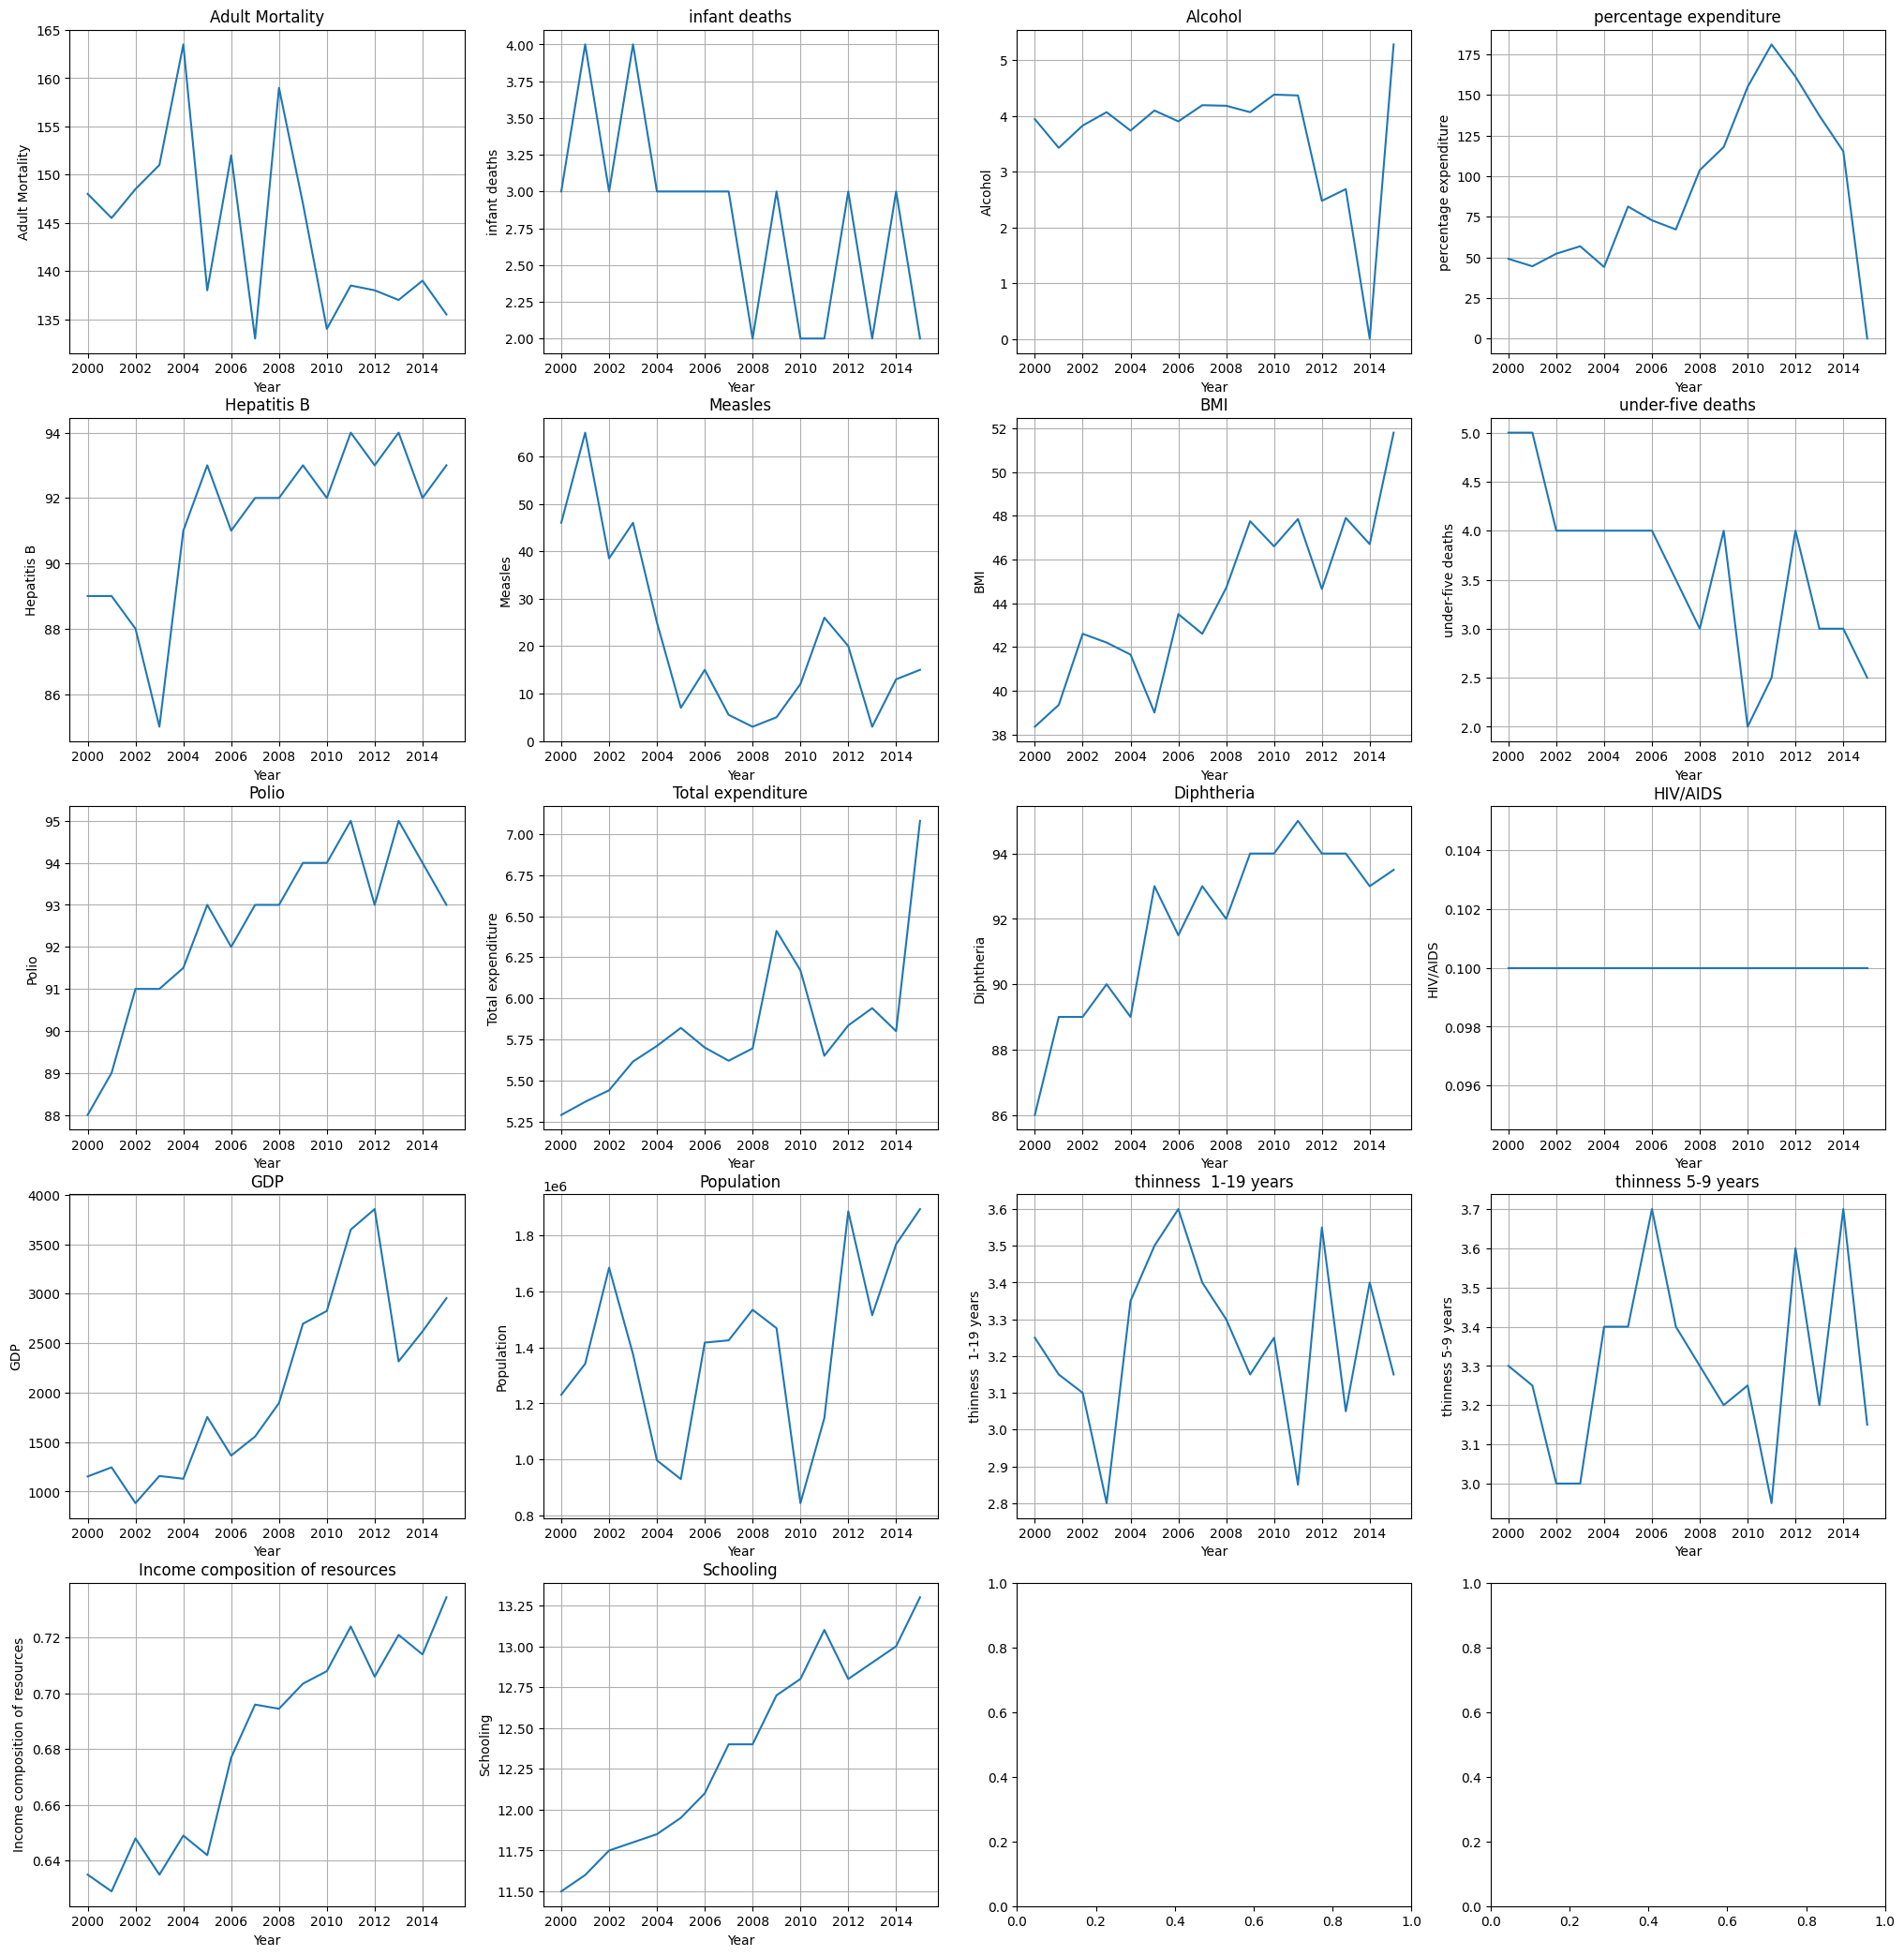

In [15]:
fig, ax = plt.subplots(5,4,figsize = (25,26))

for i in range(len(num_cols[1:])):
    row = i // 4
    col = i % 4
    y = group_by_year[num_cols[i+1]].agg('median')

    sns.lineplot(x=y.keys(), y=y ,ax= ax[row,col])
    ax[row,col].set_title(num_cols[i+1])
    ax[row,col].grid(True)


plt.show()

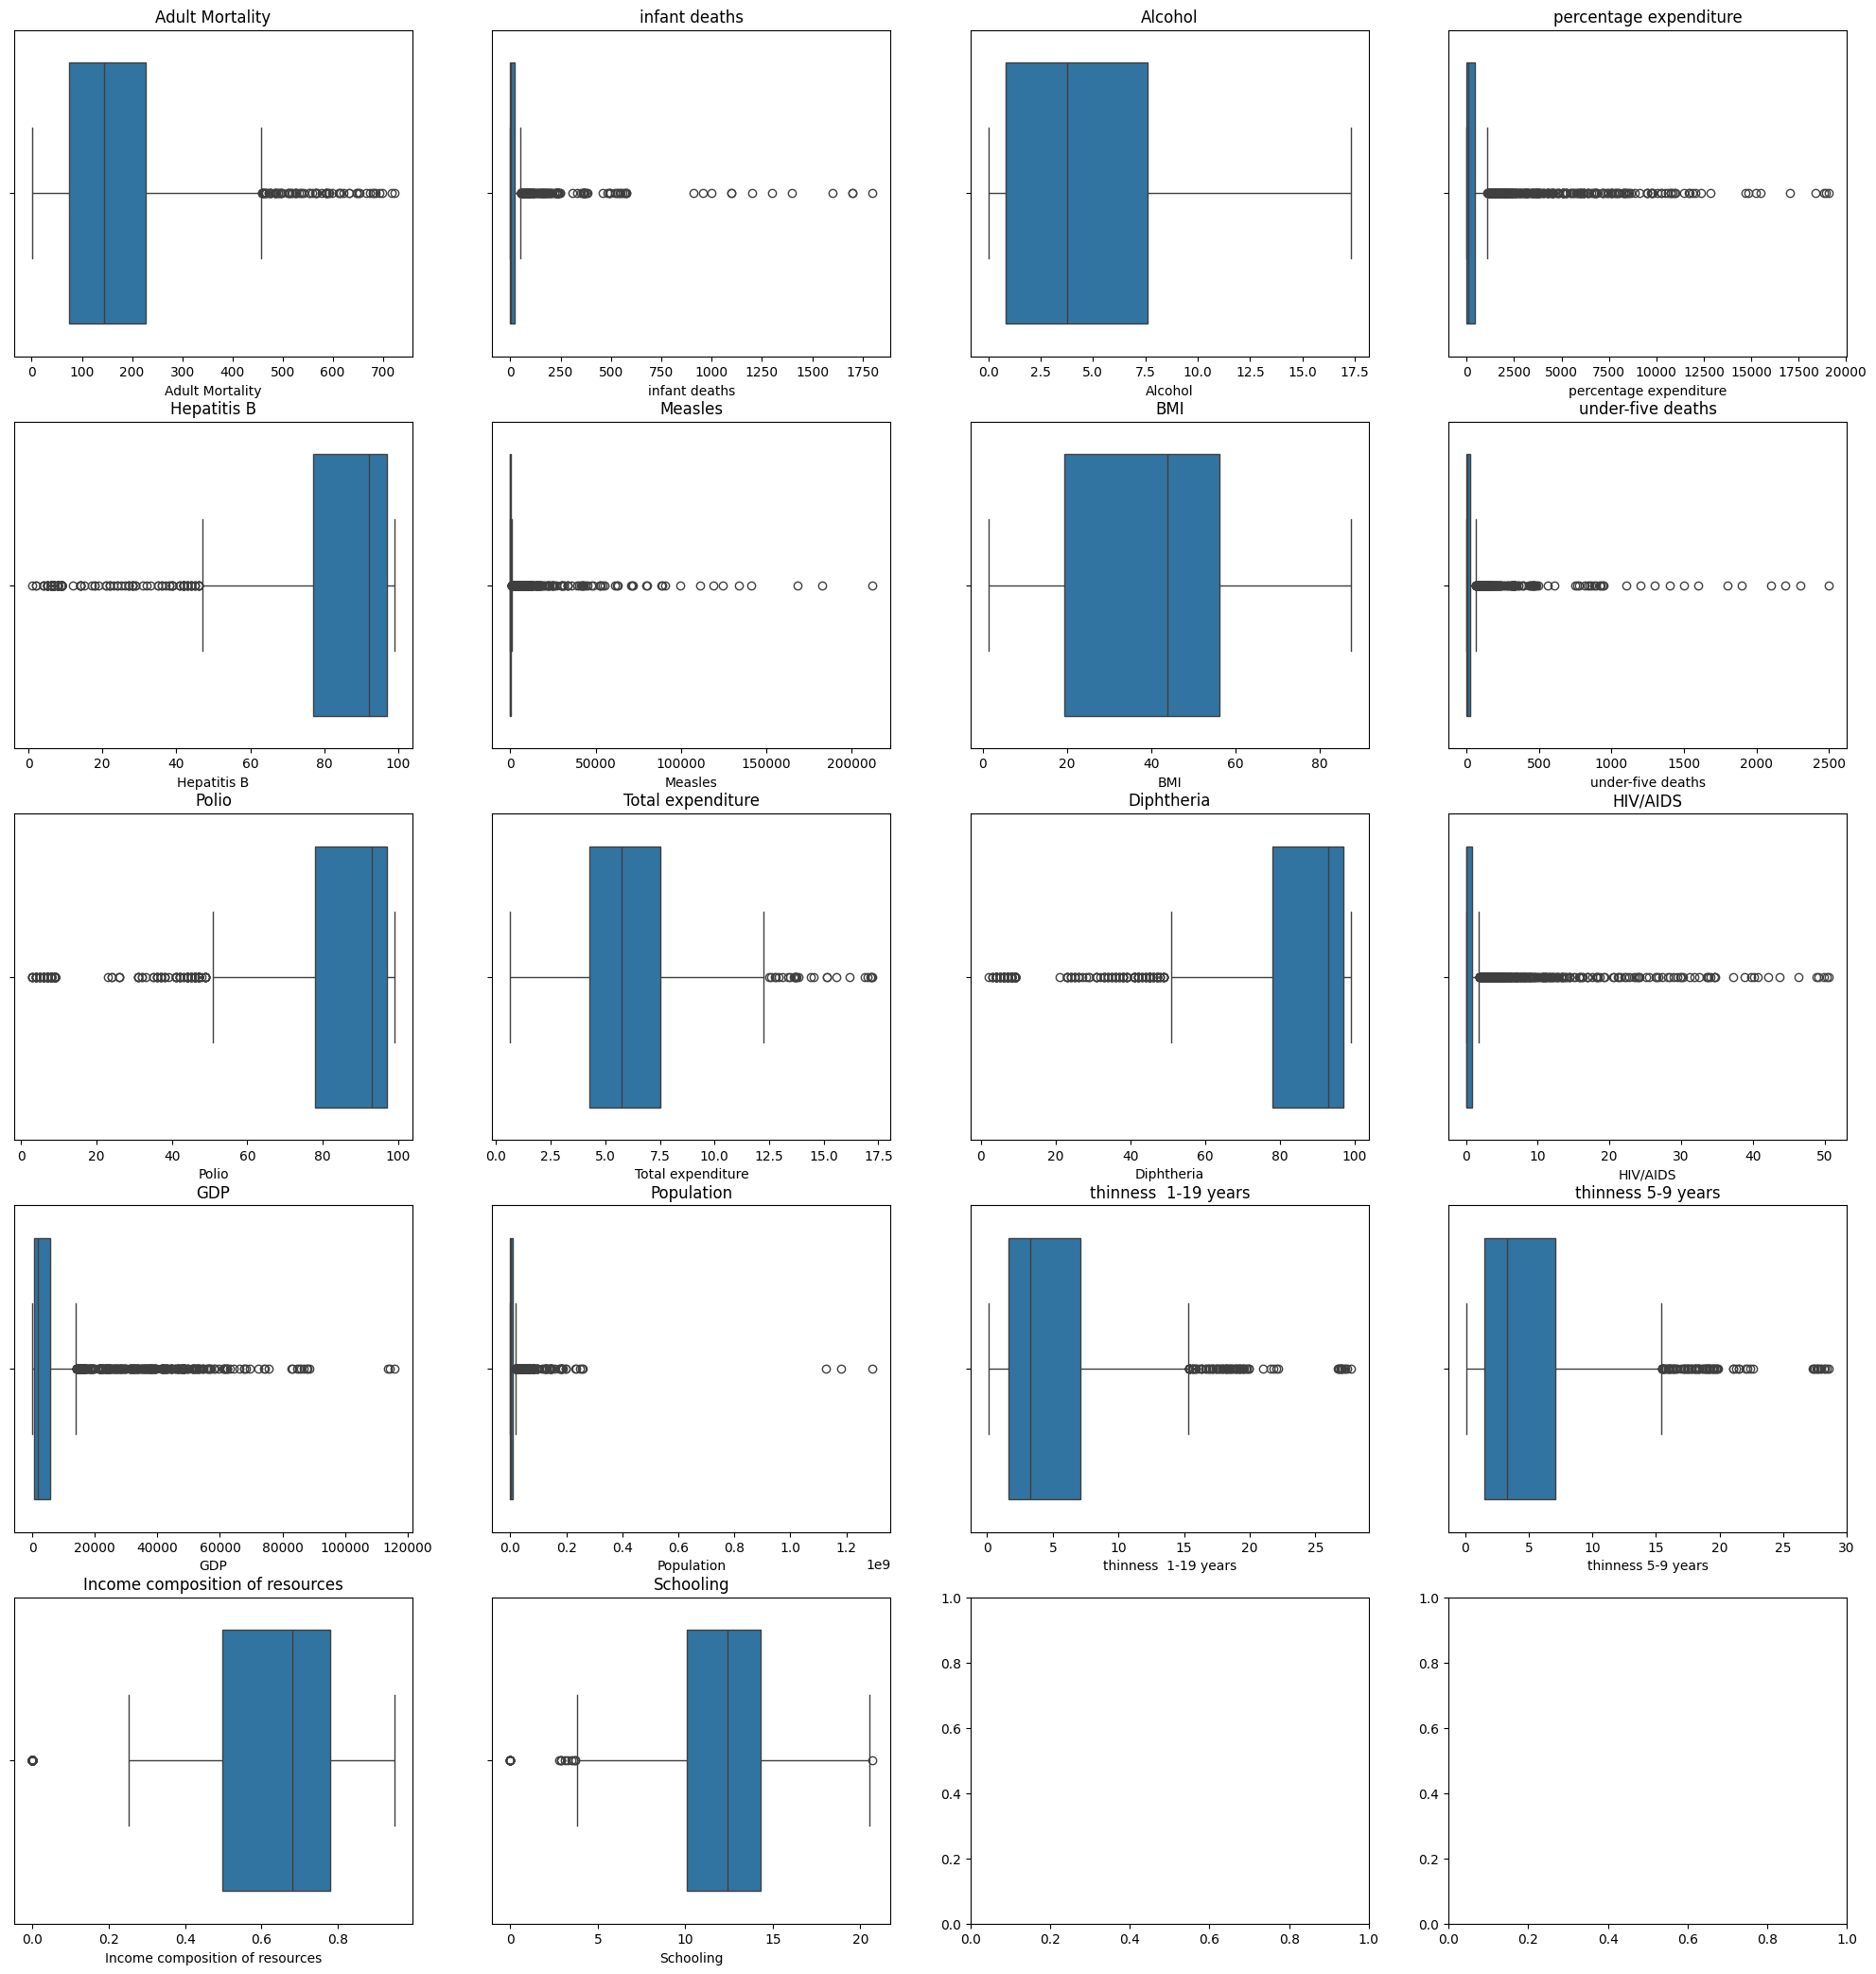

In [16]:
fig , ax = plt.subplots(5,4,figsize=(25,26))
for i in range(len(num_cols[1:])):
    row = i // 4
    col = i % 4


    sns.boxplot(x=X_train[num_cols[i+1]],ax= ax[row,col])
    ax[row,col].set_title(num_cols[i+1])

plt.show()
# knowing the outliers and the distribution for the features

In [17]:
X_train['Status'].value_counts()

Status
Developing    1935
Developed      415
Name: count, dtype: int64

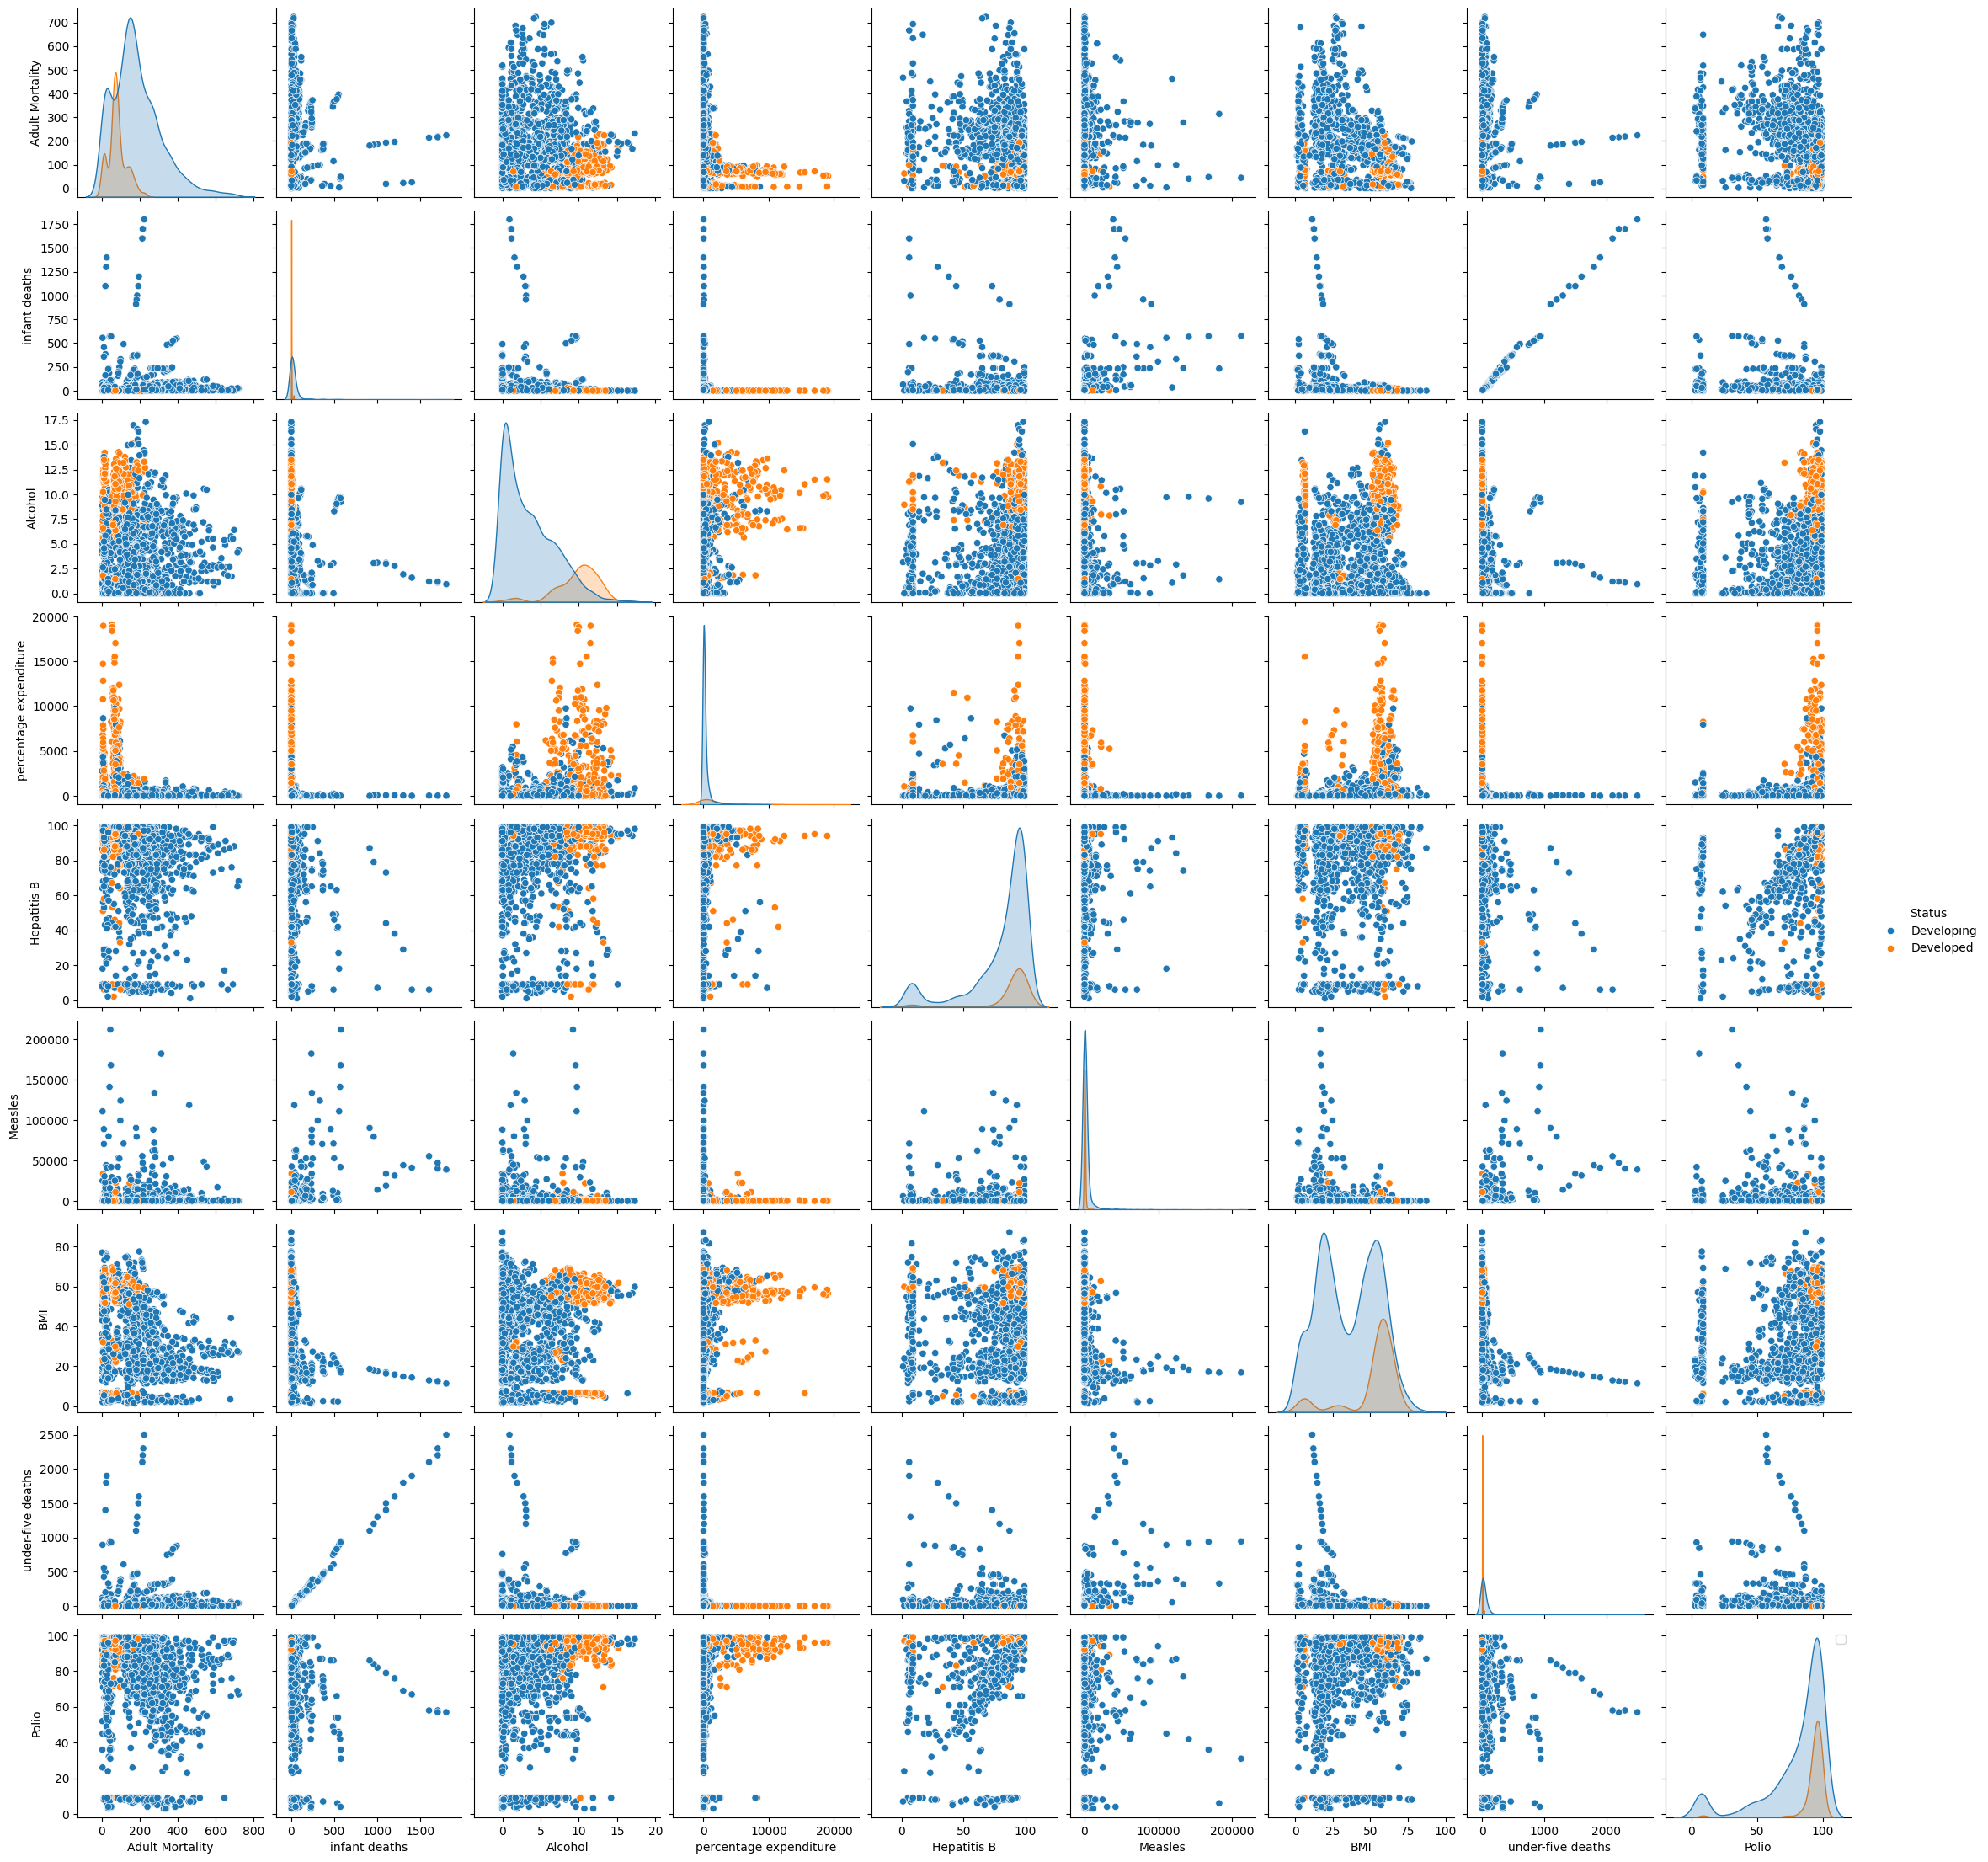

In [18]:
selected_columns = num_cols[1:10].to_list()
selected_columns.append('Status')

sns.pairplot(data=X_train[selected_columns],hue = 'Status')
plt.legend()
plt.show()
# knowing the relationships between the features and each other

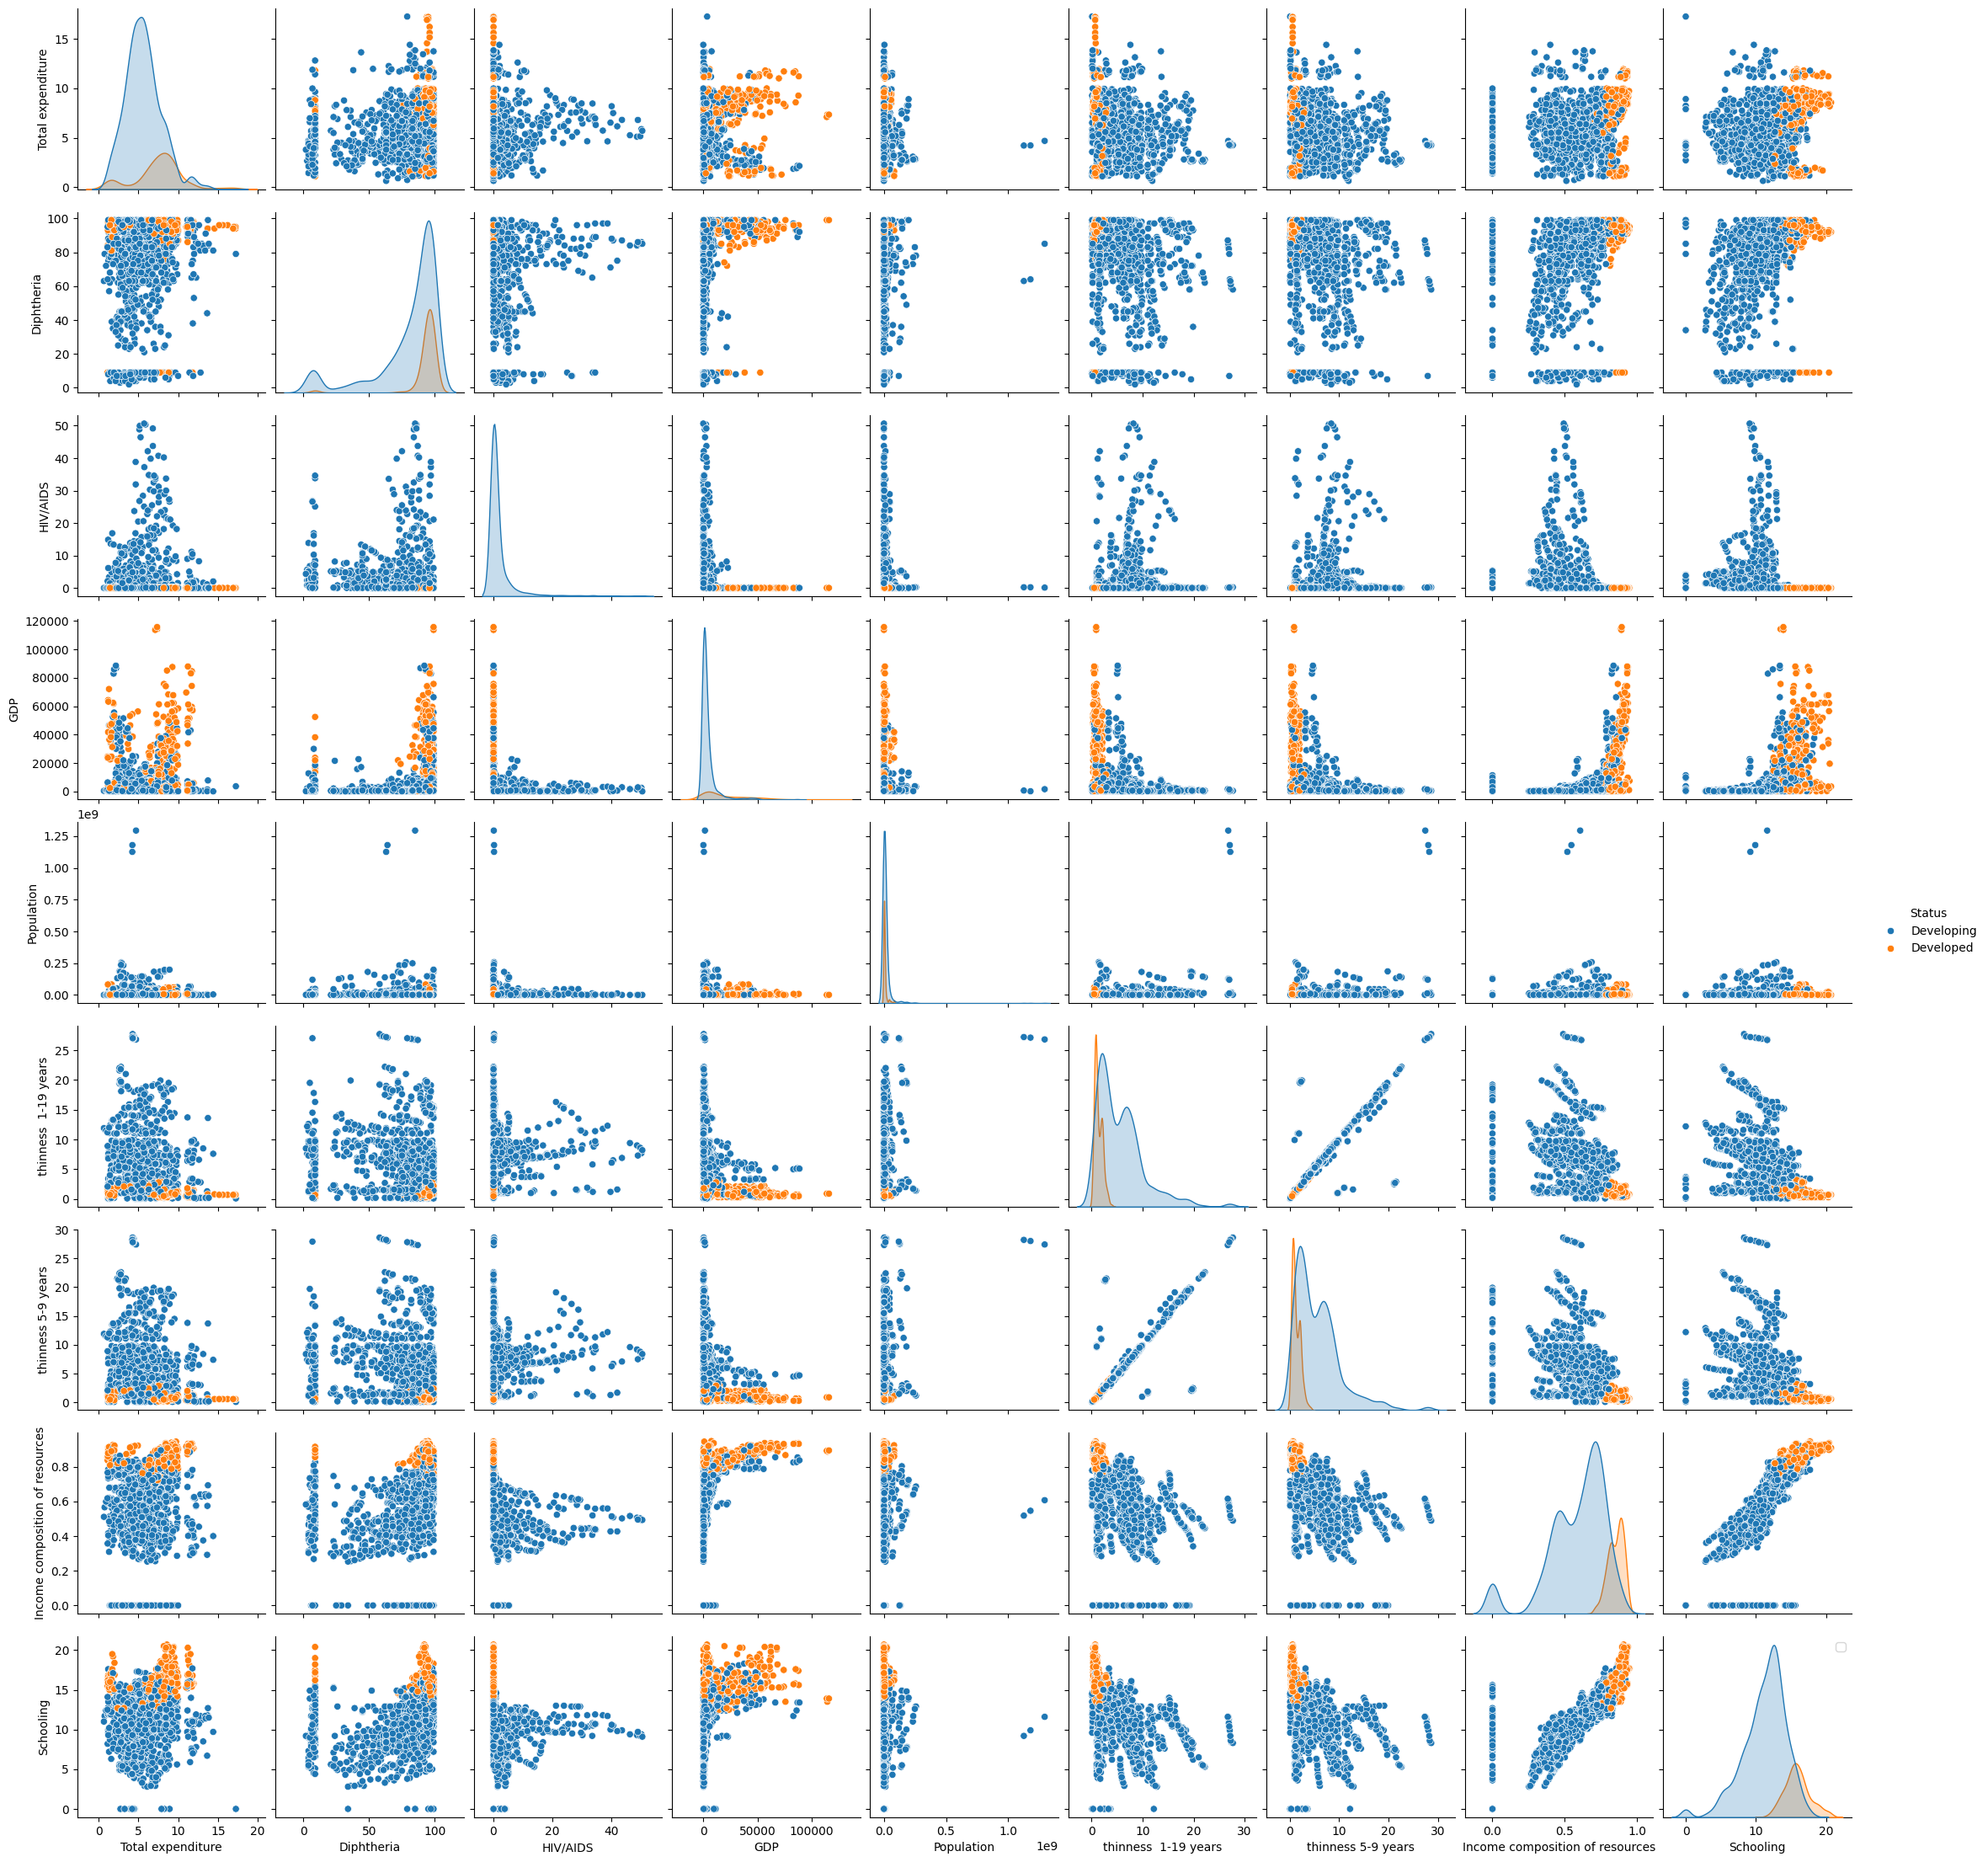

In [19]:
selected_columns = num_cols[10:].to_list()
selected_columns.append('Status')

sns.pairplot(data=X_train[selected_columns],hue = 'Status')
plt.legend()
plt.show()

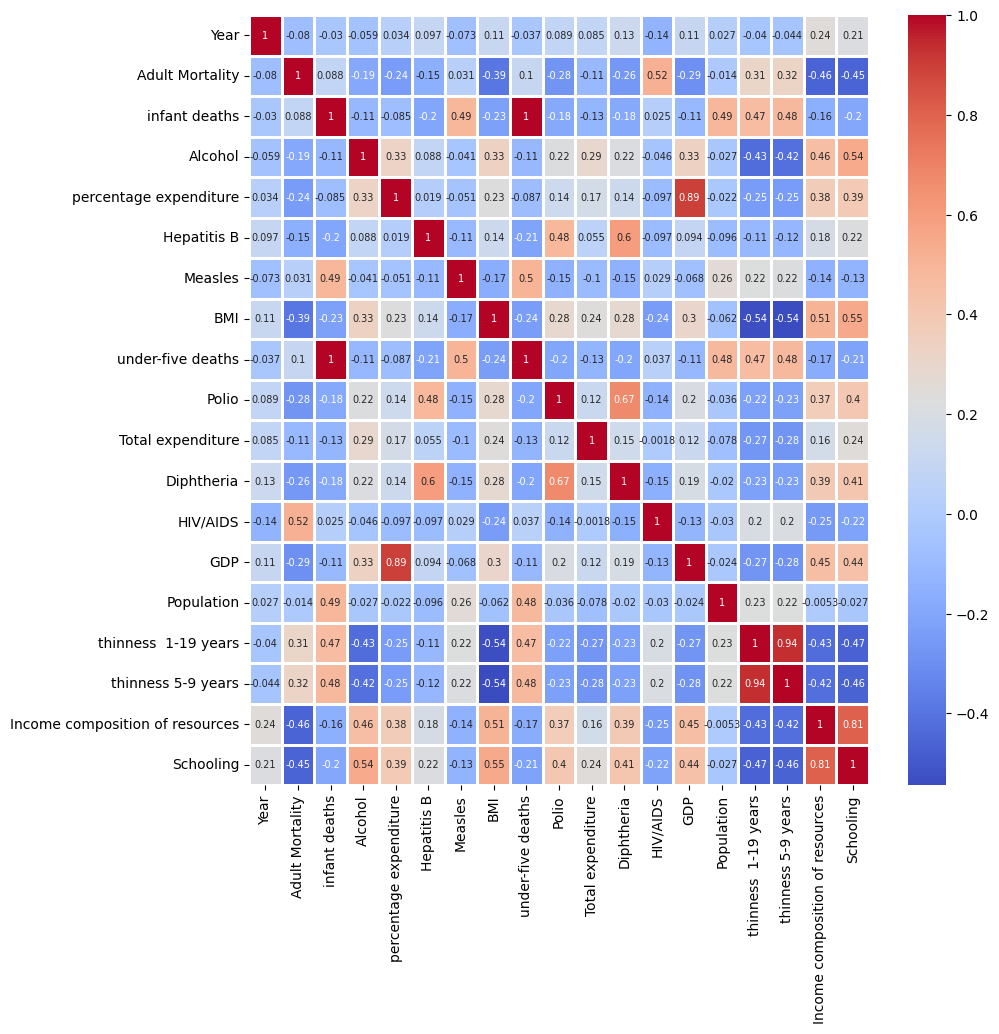

In [20]:
fig, ax = plt.subplots(1,1 , figsize=(10,10))
cm = X_train[num_cols].corr()
sns.heatmap(data= cm ,annot=True ,cmap='coolwarm',linecolor='white',linewidths=1,ax= ax,annot_kws={'size':7})
plt.show()

* **removing thinness 5-9column(thiness 1-19 years includes it) and percentage expenditure(GDP deaths includes it) and infant deaths(under-five deaths includes it)**

***
* Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
* Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
- **Yes as there is a good corr between these feature and life expectancy**
* How does Infant and Adult mortality rates affect life expectancy?
- **the more Adult and infant mortality the less the life expectancy as there is a good negative corr between them**
* Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
- **the BMI have a good positve corr with life expectancy but alchohol not bad positive corr.**
* What is the impact of schooling on the lifespan of humans?
- **Schooling has a powerful impact on the life expectancy**
* Does Life Expectancy have positive or negative relationship with drinking alcohol?
- **positve but not powerful**
* Do densely populated countries tend to have lower life expectancy?
- **No there is no correlation between them**
* What is the impact of Immunization coverage on life Expectancy?
- **there is a postive correlation between the  Immunization covering and the value of life expectancy so it has a powerful impact**
***

# Cleaning and Preprocessing

In [21]:
X_train = X_train.drop(columns=['thinness 5-9 years','percentage expenditure','infant deaths'])
X_test = X_test.drop(columns=['thinness 5-9 years','percentage expenditure','infant deaths'])

In [22]:
# lets drop the country column as it not useful in generalization
X_train= X_train.drop(columns=["Country"])
X_test= X_test.drop(columns=["Country"])

In [23]:
X_train.isna().sum()

Year                                 0
Status                               0
Adult Mortality                      8
Alcohol                            158
Hepatitis B                        439
Measles                              0
BMI                                 27
under-five deaths                    0
Polio                               14
Total expenditure                  185
Diphtheria                          14
HIV/AIDS                             0
GDP                                345
Population                         516
thinness  1-19 years                27
Income composition of resources    131
Schooling                          129
dtype: int64

In [24]:
filt = X_train.isna()

X_train.loc[filt.any(axis=1)]

Year      Status  Adult Mortality  Alcohol  Hepatitis B  Measles   BMI  \
462   2001  Developing            152.0     3.81          NaN        0  22.1   
2172  2011  Developing            143.0    10.43         99.0        0  44.5   
381   2002  Developing             95.0     0.13         99.0        0  28.0   
847   2002  Developing            334.0     6.01          NaN       24  19.1   
1926  2015  Developing             99.0      NaN         99.0        0  54.6   
...    ...         ...              ...      ...          ...      ...   ...   
769   2013  Developing              NaN     0.01         96.0        0  58.4   
2919  2002  Developing             69.0     2.44          NaN    25036  17.3   
2135  2015  Developing            222.0      NaN         97.0      843   6.5   
2169  2014  Developing            139.0     9.97         99.0        0  46.7   
1130  2007  Developing            266.0     6.08          NaN        0   4.7   

      under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
462                   0   91.0               5.19         9.0       0.8   
2172                  0   99.0               7.58        99.0       0.1   
381                   0   99.0               3.40        94.0       0.1   
847                   4   44.0               2.50        36.0       2.9   
1926                  1   99.0                NaN        99.0       0.1   
...                 ...    ...                ...         ...       ...   
769                   0   96.0               5.58        96.0       0.1   
2919                 66   85.0               6.93        84.0      18.4   
2135                 15   97.0                NaN        97.0       0.1   
2169                  0   99.0               6.72        99.0       0.1   
1130                 23   62.0               5.56        63.0       2.7   

               GDP  Population  thinness  1-19 years  \
462    1268.884564    443716.0                   9.4   
2172           NaN         NaN                   4.3   
381   16846.219800         NaN                   6.7   
847    2711.171140     66647.0                   1.4   
1926  16627.364330         NaN                   7.1   
...            ...         ...                   ...   
769     722.756650         NaN                   2.7   
2919    377.135244    111249.0                   7.4   
2135   9329.298351   1449687.0                   2.3   
2169           NaN         NaN                   4.3   
1130    615.819819   9556889.0                   4.2   

      Income composition of resources  Schooling  
462                             0.562       11.0  
2172                            0.733       12.9  
381                             0.820       13.3  
847                             0.542        8.2  
1926                            0.795       13.7  
...                               ...        ...  
769                             0.721       12.7  
2919                            0.433       10.0  
2135                            0.805       15.0  
2169                            0.723       13.1  
1130                            0.458        8.4  

[1023 rows x 17 columns]

### we will add simple imputer to replace the non values in the columns with the median as the outliers occurance

In [25]:
X_train_exp = X_train.copy()

In [26]:
from sklearn.impute import SimpleImputer
simple_median = SimpleImputer(strategy='median')
simple_most_freq = SimpleImputer(strategy='most_frequent')

num_cols = X_train_exp.select_dtypes(include=np.number).columns
cat_cols = X_train_exp.select_dtypes(include=object).columns

In [27]:
X_train_exp[num_cols] = simple_median.fit_transform(X_train_exp[num_cols])
X_train_exp[cat_cols] = simple_most_freq.fit_transform(X_train_exp[cat_cols])

In [28]:
X_train_exp.isna().sum()

Year                               0
Status                             0
Adult Mortality                    0
Alcohol                            0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
Income composition of resources    0
Schooling                          0
dtype: int64

In [29]:
old_skwed = X_train_exp[num_cols].skew().sort_values(ascending=True)
old_skwed

Hepatitis B                        -2.303692
Polio                              -2.117674
Diphtheria                         -2.090875
Income composition of resources    -1.217192
Schooling                          -0.624070
BMI                                -0.246043
Year                               -0.011046
Alcohol                             0.656269
Total expenditure                   0.672615
Adult Mortality                     1.219953
thinness  1-19 years                1.733720
GDP                                 3.564115
HIV/AIDS                            5.356099
under-five deaths                   9.596752
Measles                            10.026217
Population                         19.606445
dtype: float64

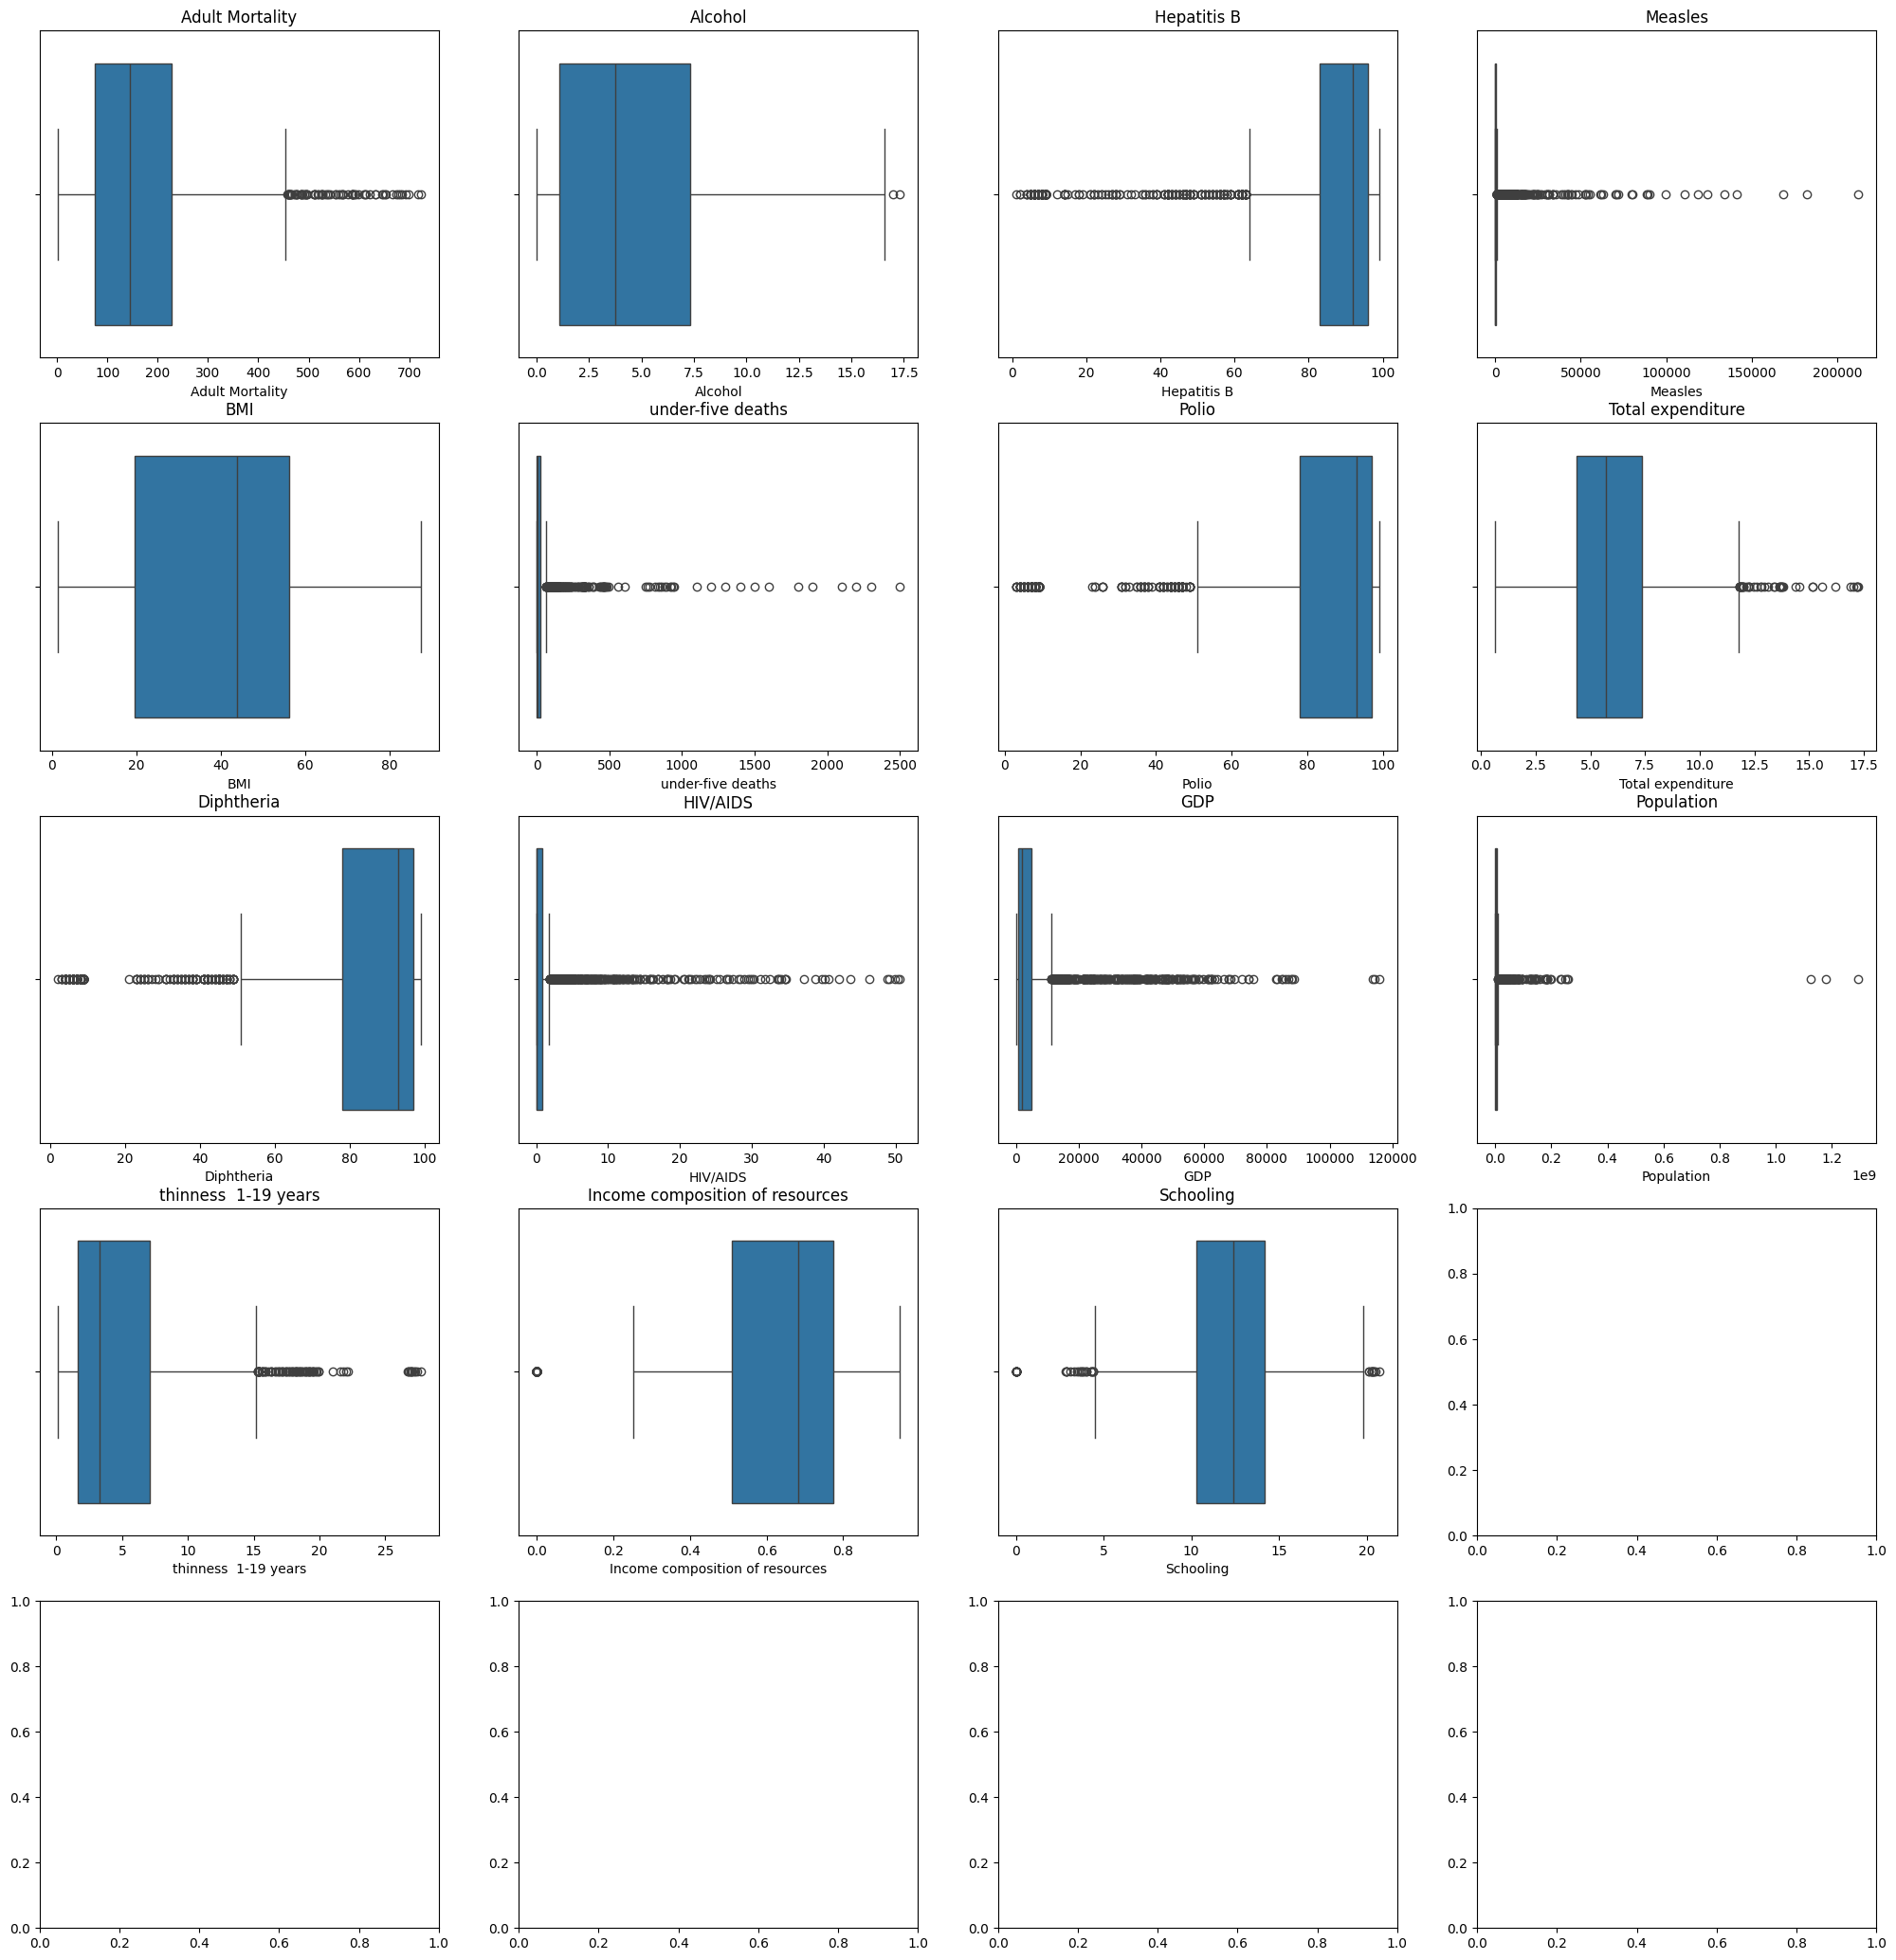

In [30]:
fig , ax = plt.subplots(5,4,figsize=(25,26))
for i in range(len(num_cols[1:])):
    row = i // 4
    col = i % 4


    sns.boxplot(x=X_train_exp[num_cols[i+1]],ax= ax[row,col])
    ax[row,col].set_title(num_cols[i+1])

plt.show()


In [31]:
X_train_exp.columns

Index(['Year', 'Status', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [32]:
col_right_skwed = ['Adult Mortality','Alcohol','Measles','under-five deaths','Total expenditure','HIV/AIDS','GDP','Population','thinness  1-19 years','Schooling']
col_left_skwed = ['Hepatitis B','Polio','Diphtheria','Income composition of resources','Schooling']



# Handle right skwed data

### Yeo_Johnson Transformer

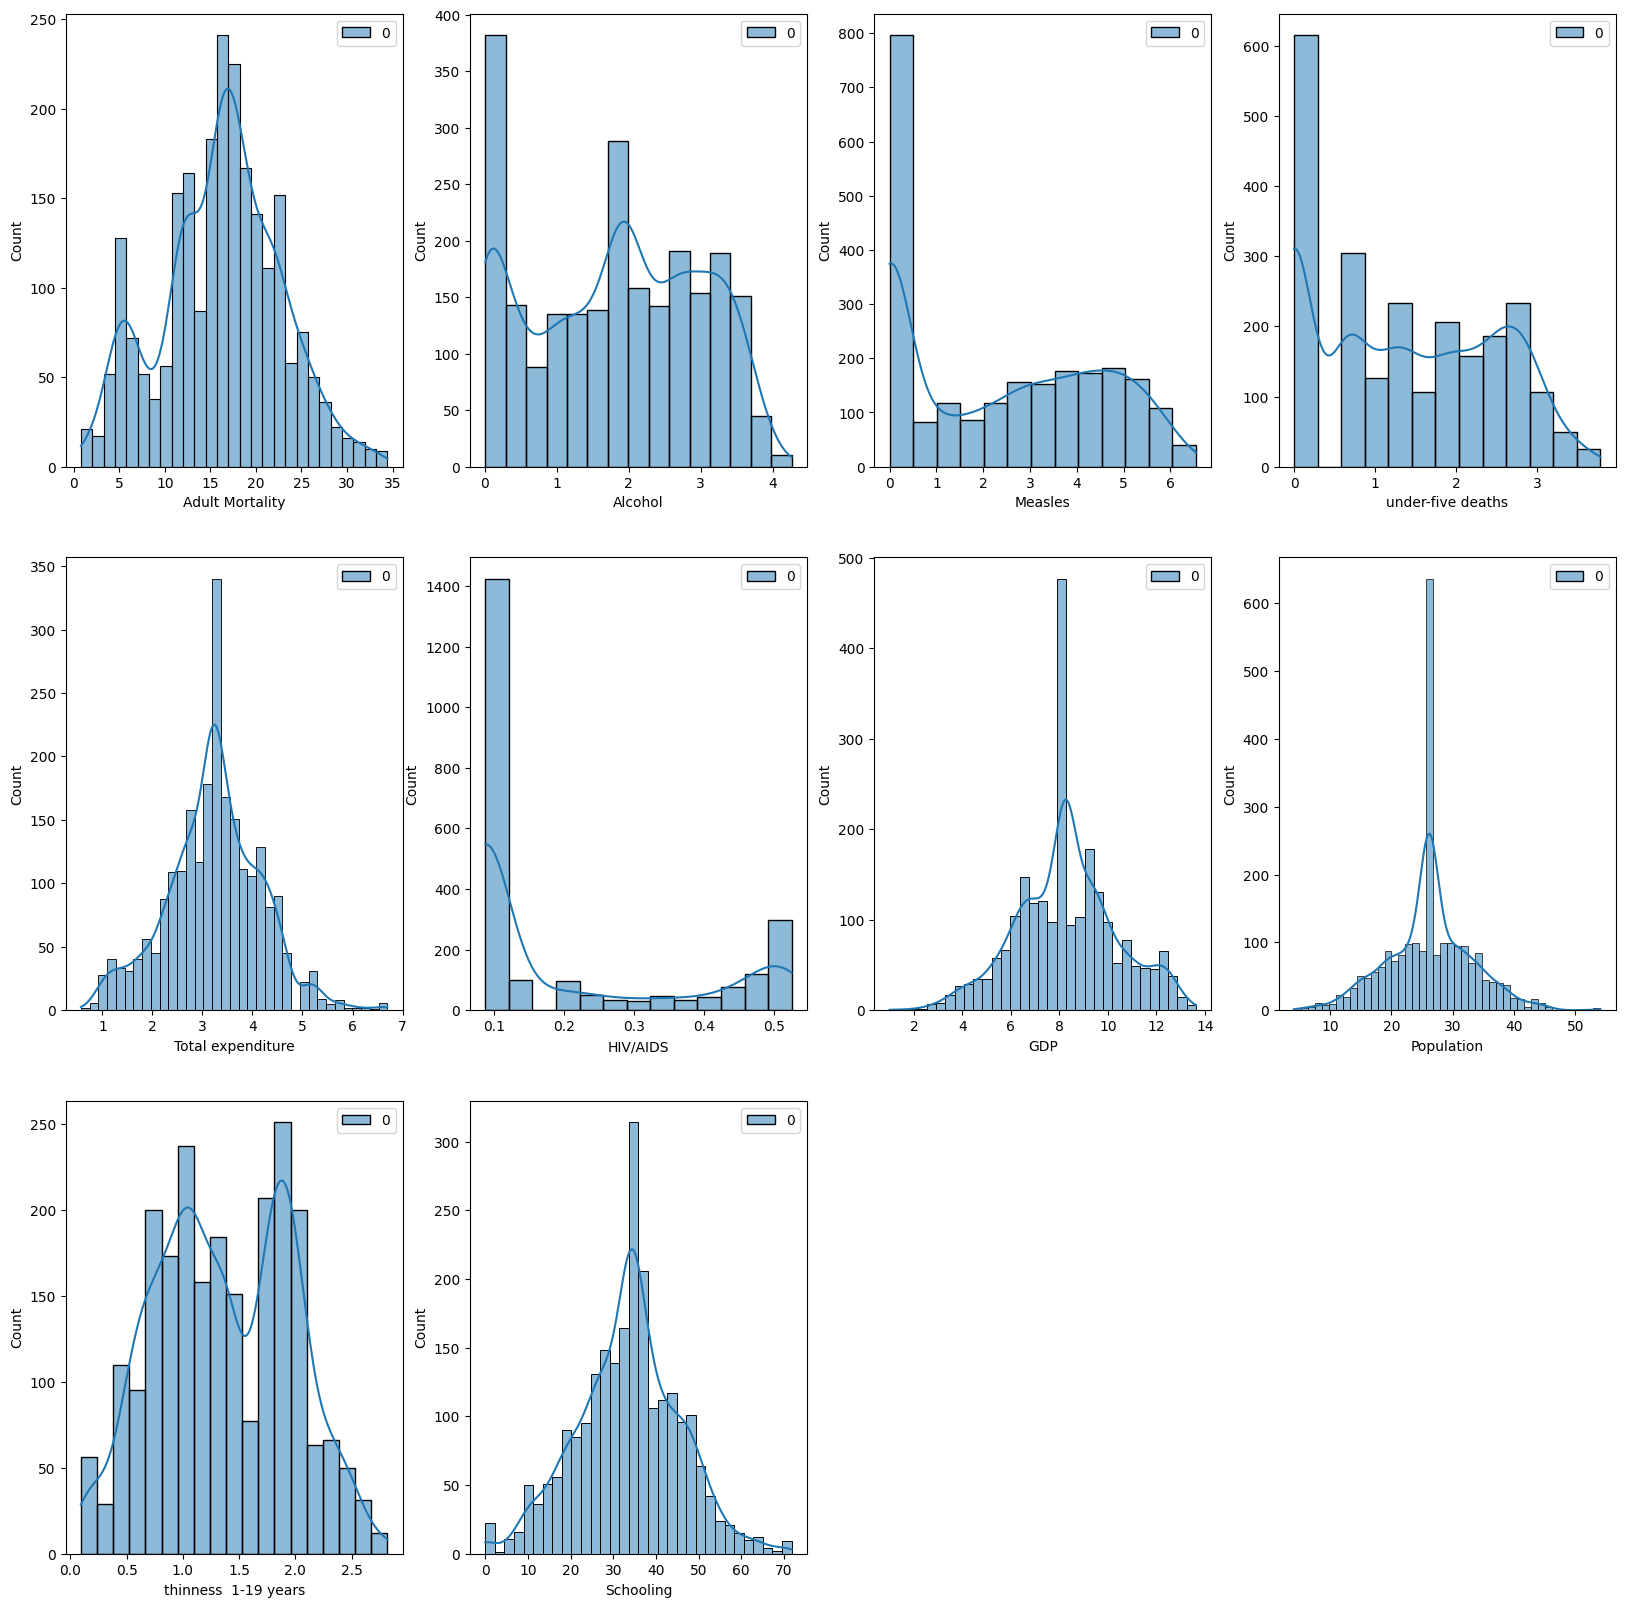

In [33]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, QuantileTransformer

Yeo_Johnson = []
fig = plt.figure(figsize=(20,20))
c= 1

for col in col_right_skwed:
    yeojohnson = PowerTransformer(standardize=False)
    df_yeojohnson = pd.DataFrame(yeojohnson.fit_transform(X_train_exp[col].values.reshape(-1,1)))

    plt.subplot(3,4,c)
    g = sns.histplot(df_yeojohnson,kde=True)
    g.set(xlabel=col)
    c +=1

    Yeo_Johnson.append(round(df_yeojohnson.skew()[0],2))

### Quantile Transformer

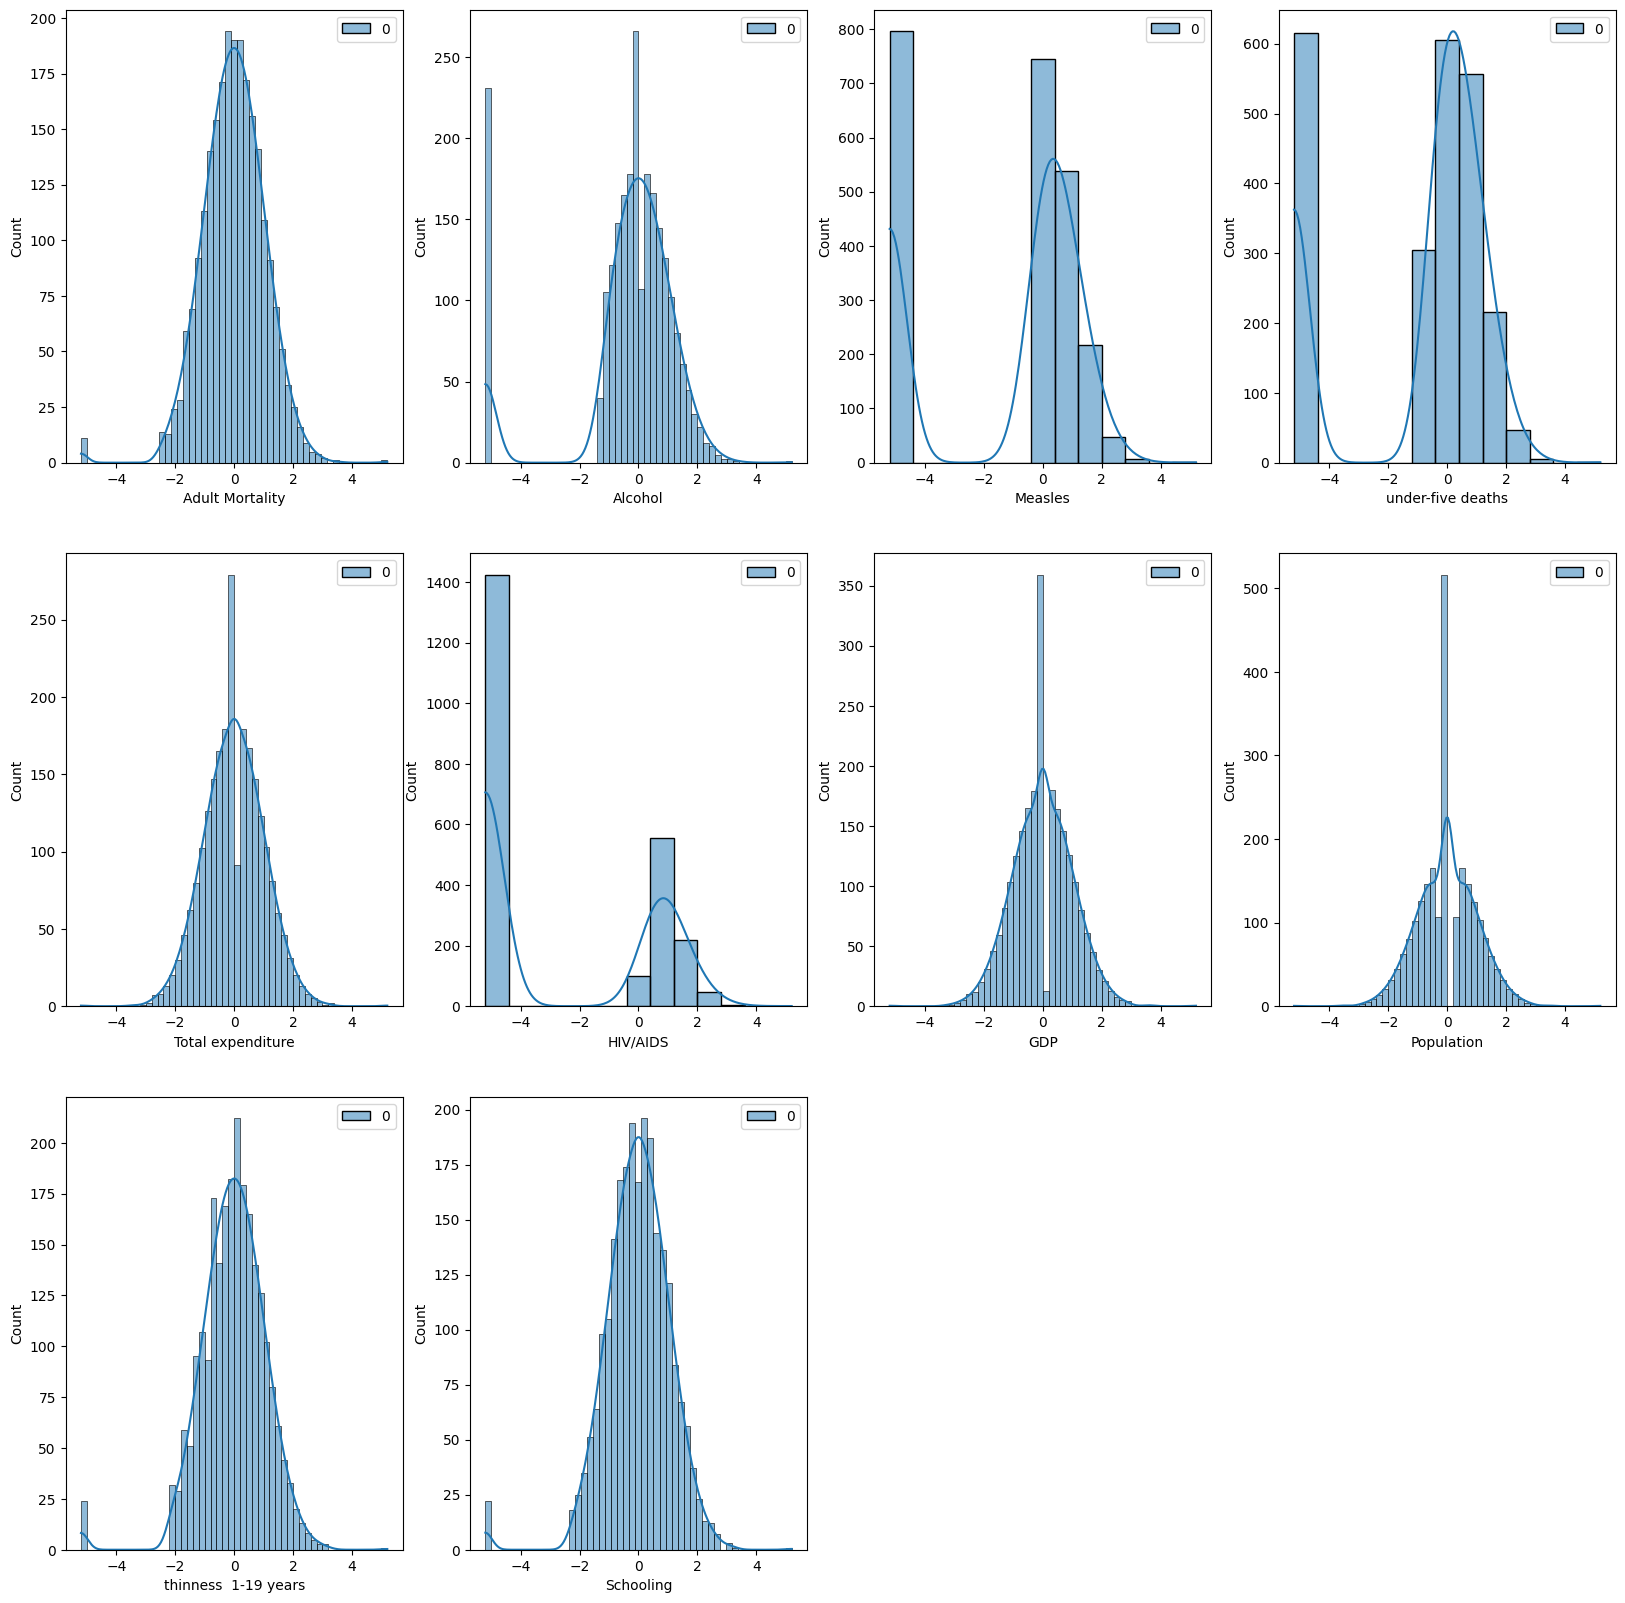

In [34]:
Quantile = []
fig = plt.figure(figsize=(20,20))
c= 1

for col in col_right_skwed:
    quantile = QuantileTransformer(output_distribution='normal')
    df_quantile = pd.DataFrame(quantile.fit_transform(X_train_exp[col].values.reshape(-1,1)))

    plt.subplot(3,4,c)
    g = sns.histplot(df_quantile,kde=True)
    g.set(xlabel=col)
    c +=1

    Quantile.append(round(df_quantile.skew()[0],2))

### log Transformer

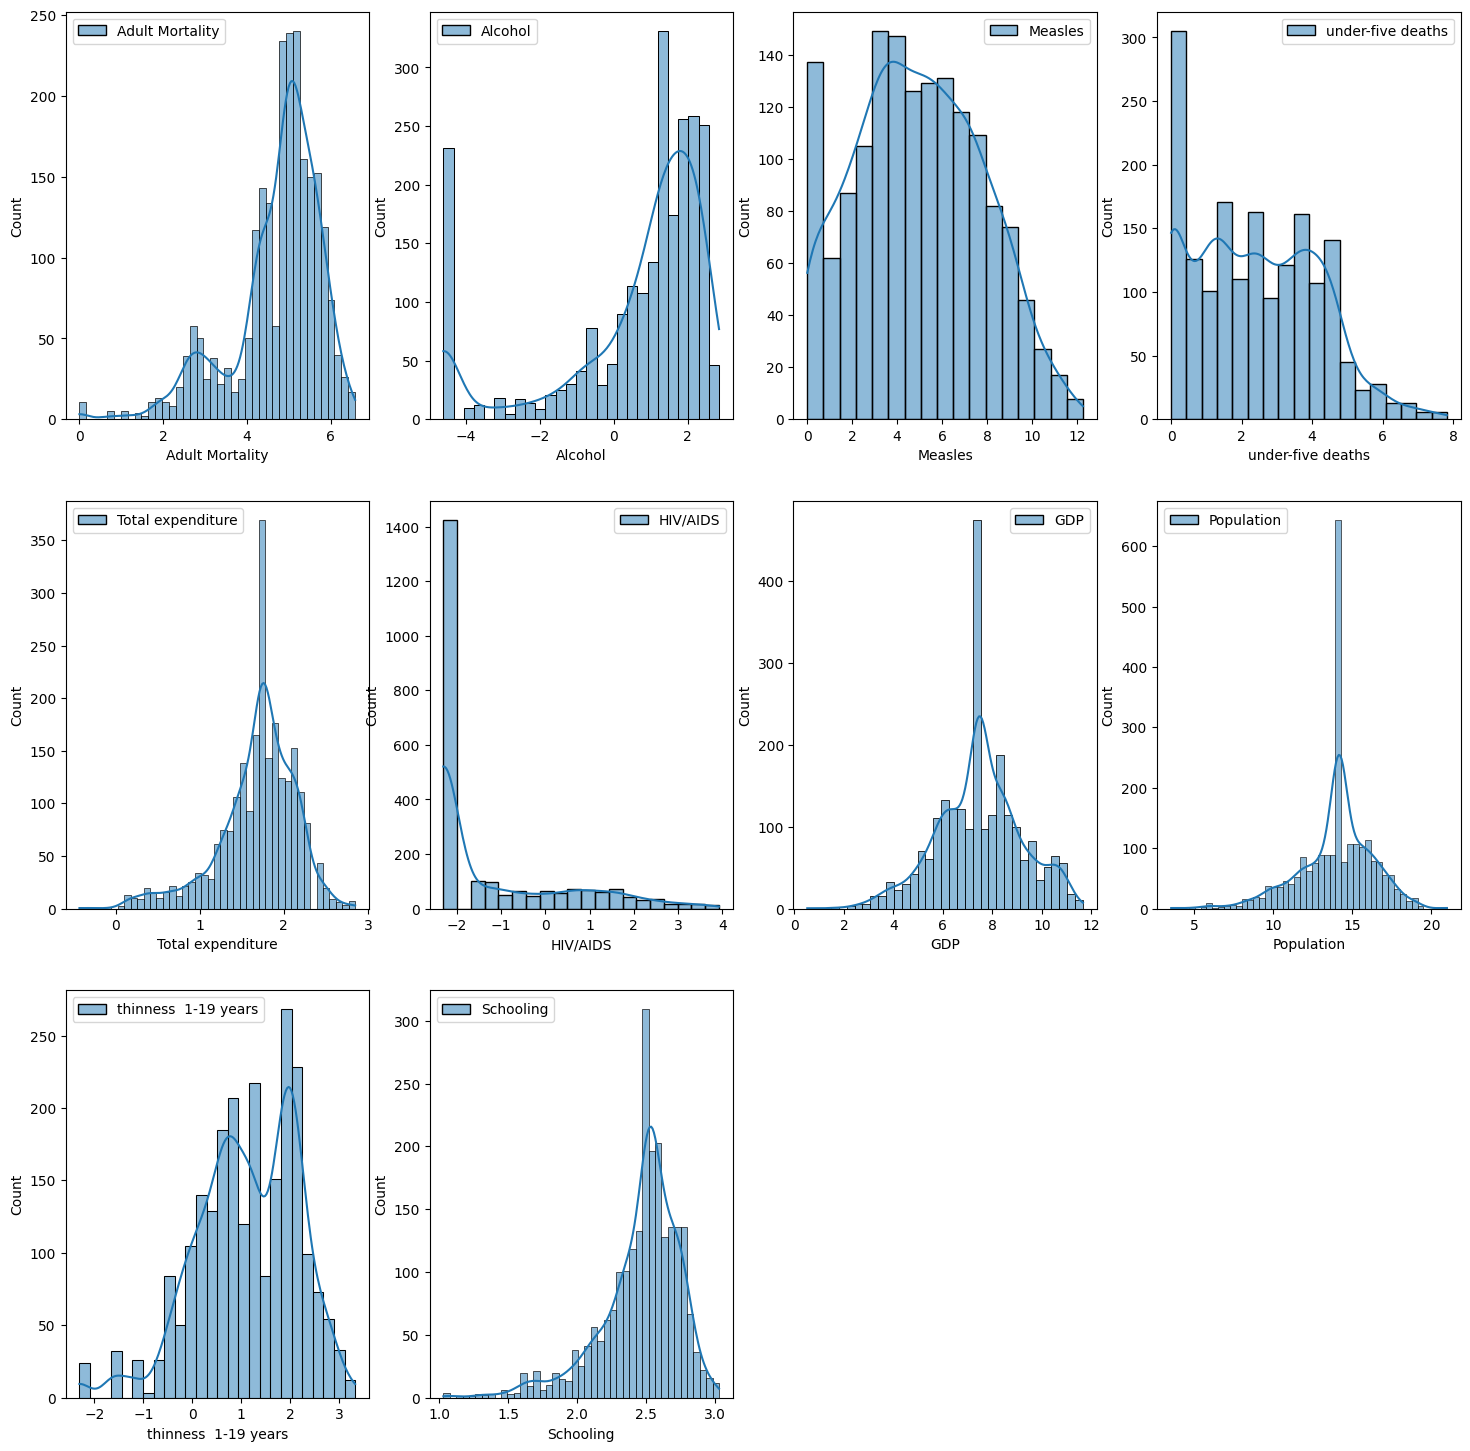

In [35]:
log_Transformer = []
fig = plt.figure(figsize=(18,18))
c = 1
for col in col_right_skwed:

    df_log = pd.DataFrame(X_train_exp[col].apply(lambda x : np.log(x)))
    plt.subplot(3,4,c)
    g = sns.histplot(df_log, kde=True)
    g.set(xlabel = col)
    c = c + 1
    log_Transformer.append(round(df_log.skew()[0],2))

In [36]:
dictt = {'Old_Skew':old_skwed[num_cols],"Yeo_Johnson":Yeo_Johnson, "Quantile_Transformer":Quantile,'Log_Transformer':log_Transformer}
pd.DataFrame(dictt,index=col_right_skwed)

Old_Skew  Yeo_Johnson  Quantile_Transformer  \
Adult Mortality        1.219953        -0.07                 -0.40   
Alcohol                0.656269        -0.08                 -1.69   
Measles               10.026217         0.18                 -0.55   
under-five deaths      9.596752         0.17                 -0.87   
Total expenditure      0.672615         0.02                  0.00   
HIV/AIDS               5.356099         0.98                  0.48   
GDP                    3.564115         0.00                  0.01   
Population            19.606445         0.03                 -0.00   
thinness  1-19 years   1.733720         0.02                 -0.82   
Schooling             -0.624070        -0.04                 -0.77   

                      Log_Transformer  
Adult Mortality                 -1.31  
Alcohol                         -1.47  
Measles                           NaN  
under-five deaths                 NaN  
Total expenditure               -0.98  
HIV/AIDS                         1.30  
GDP                             -0.15  
Population                      -0.70  
thinness  1-19 years            -0.58  
Schooling                         NaN

***We will:***
* use Yeo_Johnson for Adult Mortality, Alcohol, Measles,  under-five deaths	, GDP, thinness 1-19 years, Schooling
* Quntile for the rest

# Handle left Skewed

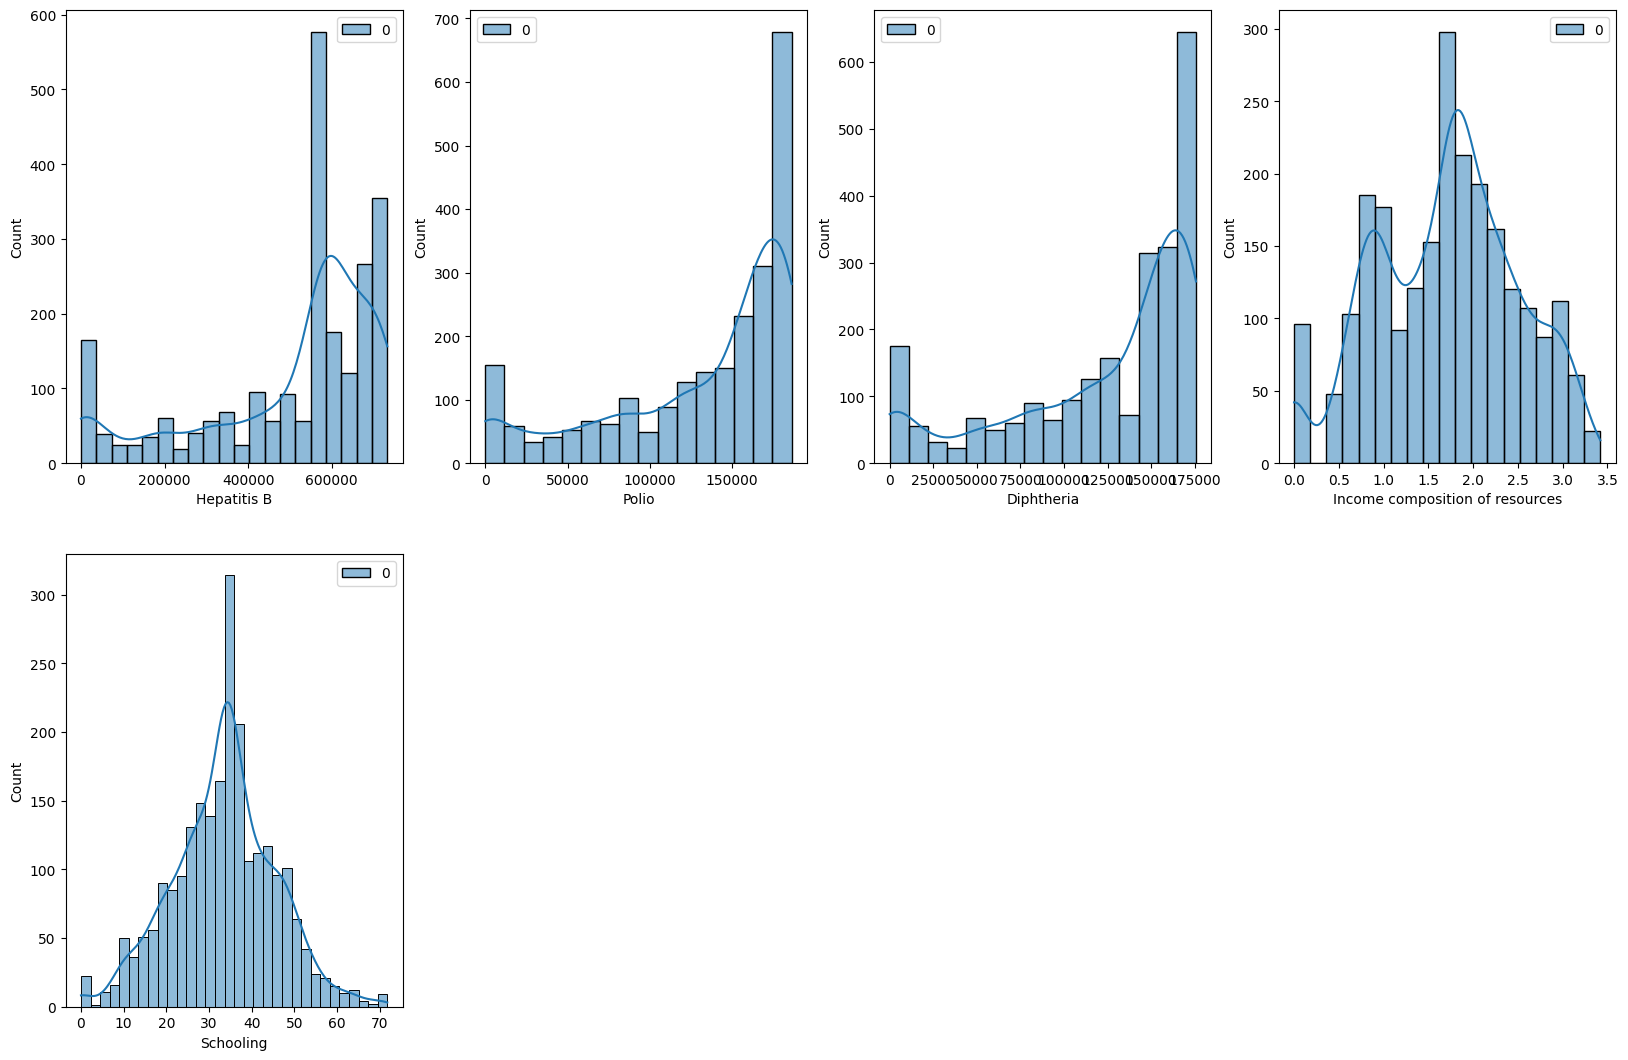

In [37]:
Yeo_Johnson = []
fig = plt.figure(figsize=(20,20))
c= 1

for col in col_left_skwed:
    yeojohnson = PowerTransformer(standardize=False)
    df_yeojohnson = pd.DataFrame(yeojohnson.fit_transform(X_train_exp[col].values.reshape(-1,1)))

    plt.subplot(3,4,c)
    g = sns.histplot(df_yeojohnson,kde=True)
    g.set(xlabel=col)
    c +=1

    Yeo_Johnson.append(round(df_yeojohnson.skew()[0],2))

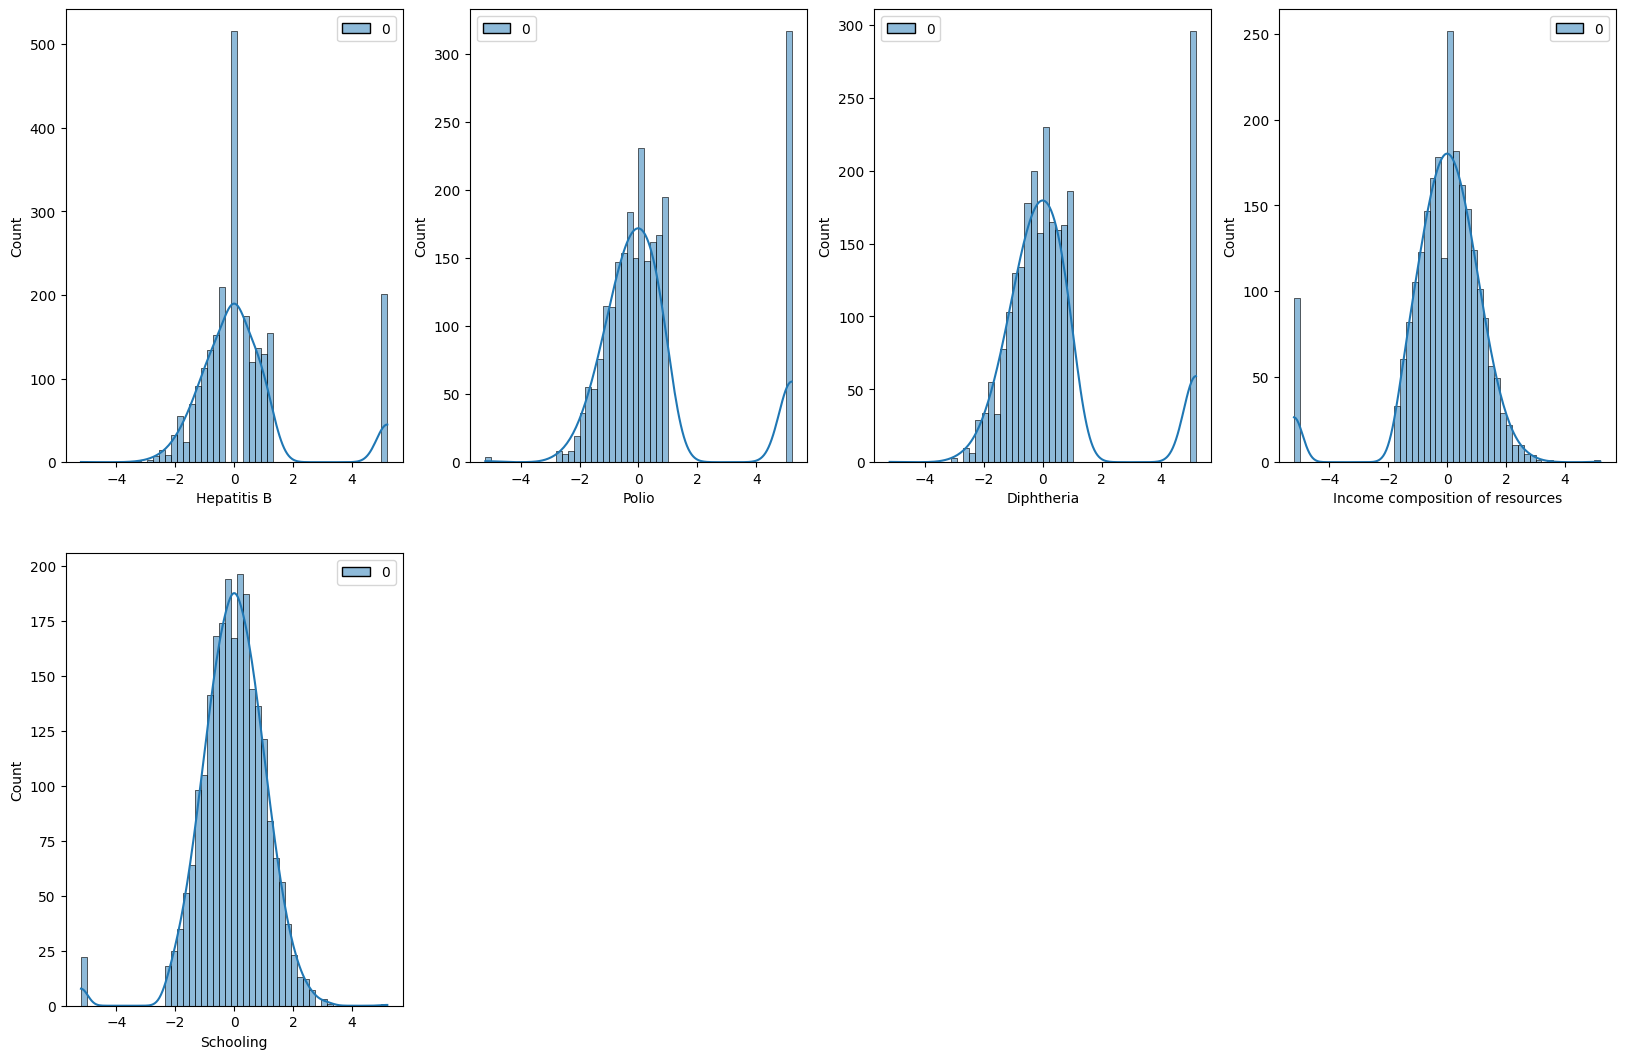

In [38]:
Quantile = []
fig = plt.figure(figsize=(20,20))
c= 1

for col in col_left_skwed:
    quantile = QuantileTransformer(output_distribution='normal')
    df_quantile = pd.DataFrame(quantile.fit_transform(X_train_exp[col].values.reshape(-1,1)))

    plt.subplot(3,4,c)
    g = sns.histplot(df_quantile,kde=True)
    g.set(xlabel=col)
    c +=1

    Quantile.append(round(df_quantile.skew()[0],2))

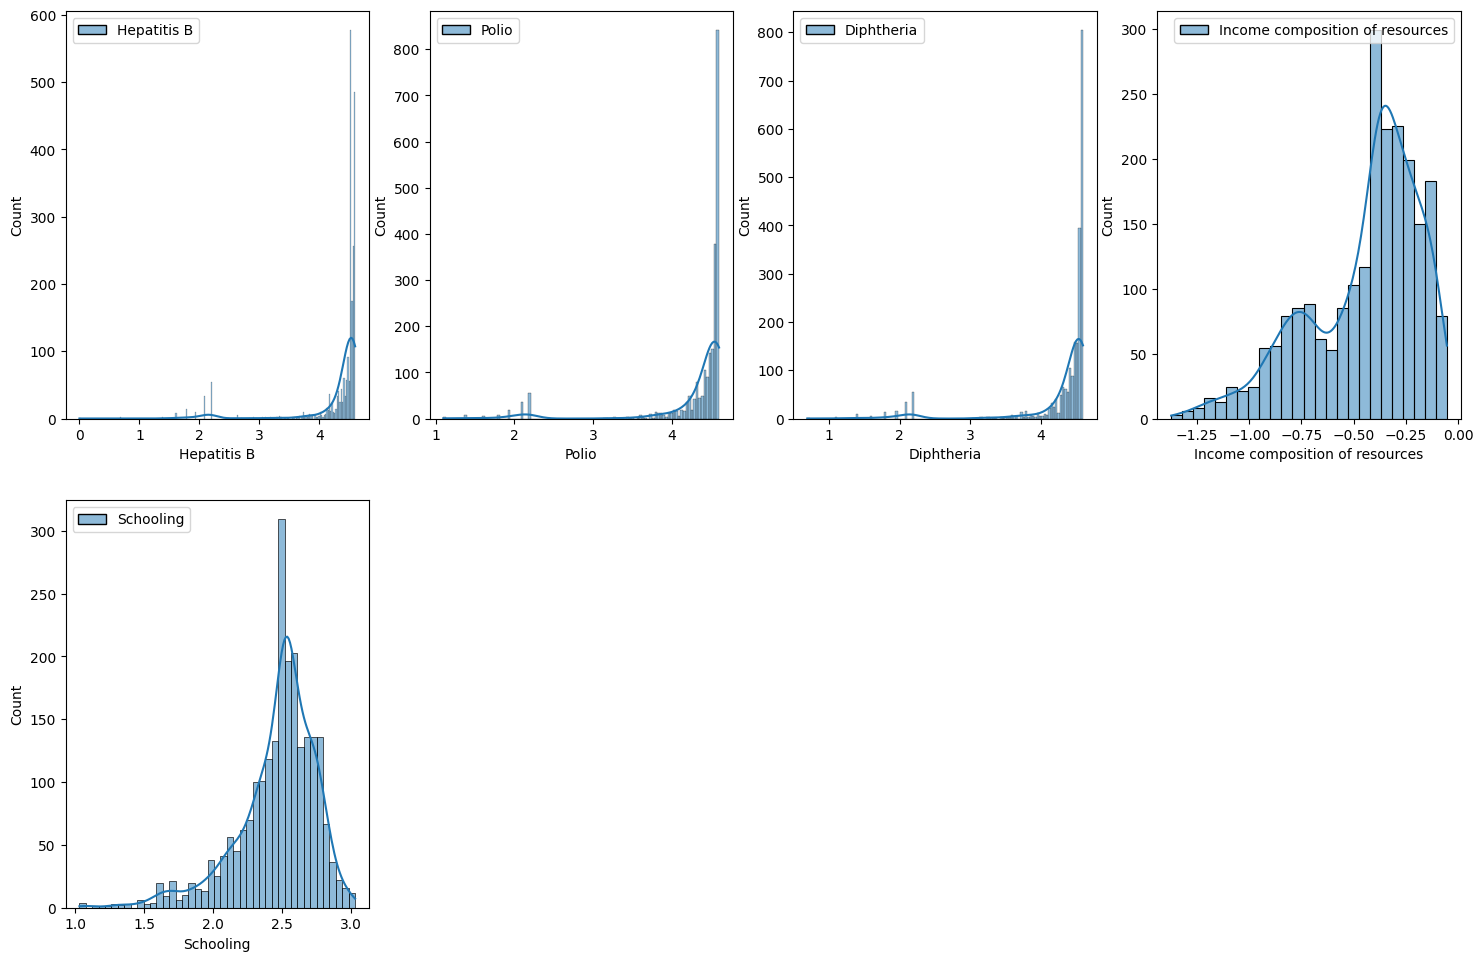

In [39]:
log_Transformer = []
fig = plt.figure(figsize=(18,18))
c = 1
for col in col_left_skwed:

    df_log = pd.DataFrame(X_train_exp[col].apply(lambda x : np.log(x)))
    plt.subplot(3,4,c)
    g = sns.histplot(df_log, kde=True)
    g.set(xlabel = col)
    c = c + 1
    log_Transformer.append(round(df_log.skew()[0],2))

In [40]:
dictt = {"Yeo_Johnson":Yeo_Johnson, "Quantile_Transformer":Quantile,'Log_Transformer':log_Transformer}
pd.DataFrame(dictt,index=col_left_skwed)

Yeo_Johnson  Quantile_Transformer  \
Hepatitis B                            -1.16                  1.76   
Polio                                  -1.03                  1.48   
Diphtheria                             -1.06                  1.56   
Income composition of resources        -0.14                 -1.73   
Schooling                              -0.04                 -0.77   

                                 Log_Transformer  
Hepatitis B                                -3.38  
Polio                                      -3.28  
Diphtheria                                 -3.20  
Income composition of resources              NaN  
Schooling                                    NaN

***We will:***
* use Yeo_Johnson for Hepatitis B, Polio,Diphtheria, Income composition of resources, Schooling

# Handling Categorical column

In [41]:
from sklearn.preprocessing import OrdinalEncoder
O_encoder = OrdinalEncoder()
X_train_exp[cat_cols]= O_encoder.fit_transform(X_train_exp[cat_cols])

# Pipelines

In [42]:
X_train.columns

Index(['Year', 'Status', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


yeo_johnson_attributes = ['Adult Mortality', 'Alcohol', 'Measles',  'under-five deaths'	, 'GDP', 'thinness  1-19 years', 'Schooling','Hepatitis B','Polio','Diphtheria','Income composition of resources']
quantile_attributes= ['Total expenditure','HIV/AIDS','Population']
remainder = ['BMI']

cat_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (OrdinalEncoder())
)

num_pipeline = make_pipeline(
    (SimpleImputer(strategy='median')),
    (StandardScaler())
)

yoeJohnson_pipeline = make_pipeline(
    (SimpleImputer(strategy='median')),
    (PowerTransformer(standardize=False)),
    (StandardScaler())
)

Quantile_pipeline = make_pipeline(
    (SimpleImputer(strategy='median')),
    QuantileTransformer(output_distribution='normal'),
    (StandardScaler())
)

preprocessing = ColumnTransformer(
   [ ('cat',cat_pipeline,cat_cols.tolist()),
    ('yeo_johnson',yoeJohnson_pipeline,yeo_johnson_attributes),
    ('quantile',Quantile_pipeline,quantile_attributes),
    ('nums',num_pipeline,remainder)
    ], remainder='passthrough'
)



In [44]:
X_train_ready = preprocessing.fit_transform(X_train.iloc[:,1:])

In [45]:
X_test_ready = preprocessing.transform(X_test.iloc[:,1:])

In [46]:
pd.DataFrame(y_trian)

Life expectancy
456              72.3
462              73.0
2172             74.6
2667             74.9
381              74.8
...               ...
1638             87.0
1095             56.7
1130             61.8
1294             79.9
860              59.4

[2350 rows x 1 columns]

In [47]:
# Founded Nan values in target column

simple_im = SimpleImputer(strategy='median')
y_trian = simple_im.fit_transform(pd.DataFrame(y_trian))


In [48]:
y_test =simple_im.transform(pd.DataFrame(y_test))


# Modeling

In [49]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_predict,cross_val_score


# metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import time



In [50]:
dummpy_reg = DummyRegressor()

dummpy_reg.fit(X_train_ready,y_trian)

mean_absolute_error(y_trian,dummpy_reg.predict(X_train_ready)) , r2_score(y_trian,dummpy_reg.predict(X_train_ready))

(7.793012802172927, 0.0)

In [51]:
model_name= []
mae = []
R2 = []
training_time = []

models = [
    LinearRegression(),
    SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42),
    Ridge(alpha=0.1, solver="cholesky",fit_intercept=False),
    ElasticNet(alpha=0.1, l1_ratio=0.5),
    Lasso(alpha=0.1),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    SVR()
]

for model in models :

    start_time = time.time()
    predictions=cross_val_predict(model,X_train_ready,y_trian,cv=3)
    fitting_time = time.time() - start_time


    model_name.append(model.__class__.__name__)
    mae.append(str((mean_absolute_error(y_trian, predictions))))
    R2.append(str(r2_score(y_trian, predictions)))
    training_time.append(fitting_time)

In [52]:
models_df = pd.DataFrame({"model-name":model_name, "mae": mae,"R2":R2, 'training-time':training_time })
models_df = models_df.set_index('model-name')
models_df.sort_values("mae")

mae                  R2  training-time
model-name                                                                  
RandomForestRegressor  1.3565808510638302   0.950719054407948       5.449596
DecisionTreeRegressor  1.8545106382978724  0.8984365203207234       0.121165
Ridge                   17.75786541232311  -4.724513702883597       0.008062
SVR                    2.5560629923958165  0.8489095358911194       0.567065
ElasticNet             3.2893001908385515  0.7932682158517468       0.011009
Lasso                  3.2893545358931195  0.7935517645516543       0.009625
SGDRegressor           3.3030756870903333  0.7944943779493032       0.263329
LinearRegression       3.3042618595783315  0.7942405511777899       0.045926

# lets hpyertune the Decision tree

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth' : [3,5,10,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf' :[1,2,4],
    'max_features' :[None,'sqrt','log2']
}

dt_reg = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator=dt_reg,param_grid=param_grid,cv=3,n_jobs=-1, scoring='neg_mean_squared_error')



In [54]:
start_time = time.time()
grid_search.fit(X_train_ready, y_trian)
fitting_time = time.time() - start_time

# Best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict using cross_val_predict with the best estimator
predictions = cross_val_predict(best_estimator, X_train_ready, y_trian, cv=3)

# Evaluate the best estimator
best_mae = mean_absolute_error(y_trian, predictions)
best_r2 = r2_score(y_trian, predictions)

In [55]:
best_mae , best_r2

(1.8501038162782844, 0.9160741964655174)

 # hpyertune the SVR

In [56]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

svr = SVR()

# Ensure y_train is a 1D array
y_trian = np.ravel(y_trian)

grid_search = GridSearchCV(estimator= svr , param_grid=param_grid, cv = 3 , n_jobs=-1 , scoring='neg_mean_squared_error')

grid_search.fit(X_train_ready,y_trian)

best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

predictions = cross_val_predict(best_estimator,X_train_ready,y_trian,cv = 3)

best_mae = mean_absolute_error(y_trian, predictions)
best_r2 = r2_score(y_trian, predictions)

best_mae , best_r2

(1.7658905524022122, 0.9235308579041417)

# Random forest hyper tunning

In [57]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(estimator= random_forest_reg , param_grid=param_grid, cv = 3 , n_jobs=-1 , scoring='neg_mean_squared_error')

grid_search.fit(X_train_ready,y_trian)

best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

predictions = cross_val_predict(best_estimator,X_train_ready,y_trian,cv = 3)

best_mae = mean_absolute_error(y_trian, predictions)
best_r2 = r2_score(y_trian, predictions)

best_mae , best_r2

(1.3629548936170204, 0.951828166285267)

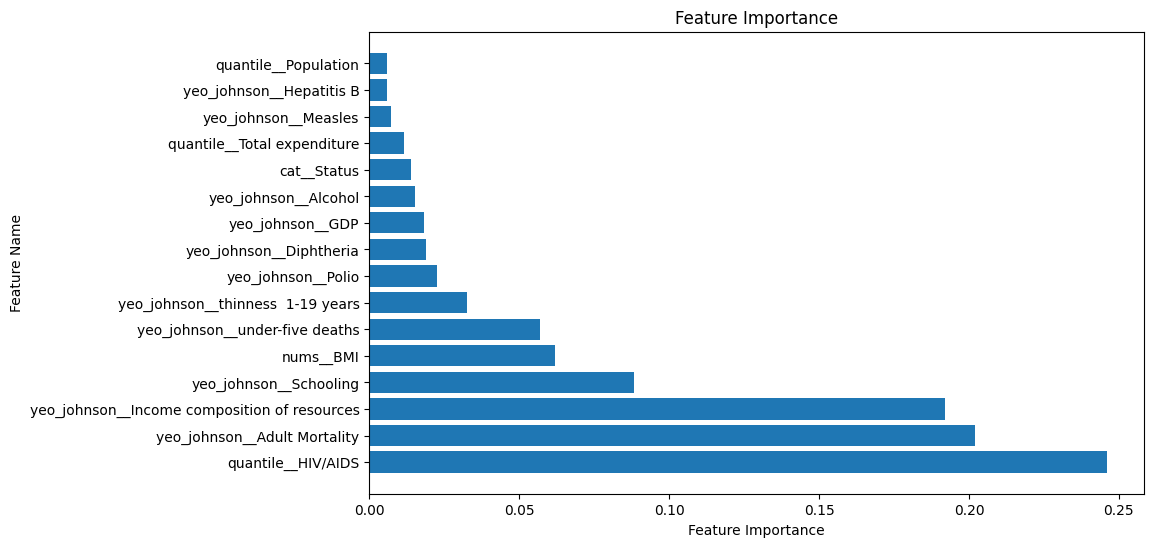

In [58]:

feature_importances = best_estimator.feature_importances_

feature_importance_df = pd.DataFrame({"Feature":preprocessing.get_feature_names_out(), "Importance":feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

# Voting Regressor

In [59]:
from sklearn.ensemble import VotingRegressor

voting_reg = VotingRegressor(estimators=[
    ('rf',RandomForestRegressor(n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=30, random_state=42)),
    ('sgd',SGDRegressor(random_state=42, max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100)),
    ('dt',DecisionTreeRegressor(random_state=42, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt'))
])

voting_scores = cross_val_score(voting_reg, X_train_ready, y_trian, cv=3, scoring='neg_mean_absolute_error')
voting_scores = -voting_scores
print(voting_scores.mean())


#voting_reg.fit(X_train_ready,y_trian)


2.007360661917879


In [60]:
from sklearn.ensemble import ExtraTreesRegressor

extra_trees_reg = ExtraTreesRegressor(random_state=42)
extra_trees_reg_scores =cross_val_score(extra_trees_reg, X_train_ready, y_trian, cv=3, scoring='neg_mean_absolute_error')
extra_trees_reg_scores = -extra_trees_reg_scores
print(extra_trees_reg_scores.mean())

extra_trees_reg.fit(X_train_ready,y_trian)

1.126165577405931


ExtraTreesRegressor(random_state=42)

# Stacking

In [61]:
from sklearn.ensemble import StackingRegressor

stacking_reg = StackingRegressor(estimators=[
    ('rf',RandomForestRegressor(n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=30, random_state=42)),
    ('sgd',SGDRegressor(random_state=42, max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100)),
    ('dt',DecisionTreeRegressor(random_state=42, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt'))
])
stacking_reg_scores = cross_val_score(stacking_reg, X_train_ready, y_trian, cv=3, scoring='neg_mean_absolute_error')
stacking_reg_scores = -stacking_reg_scores
print(stacking_reg_scores.mean() )

#stacking_reg.fit(X_train_ready,y_trian)

1.3725830665741505


# Evaluate on test set

In [62]:
predictions = extra_trees_reg.predict(X_test_ready)

best_mae = mean_absolute_error(y_test, predictions)
best_r2 = r2_score(y_test, predictions)
best_mae,best_r2

(0.8955442176870739, 0.9763307598929787)

In [63]:
import joblib

model = joblib.dump(extra_trees_reg,'model.pkl')

In [64]:
joblib.dump(preprocessing,'preprocessing.pkl')

['preprocessing.pkl']

# Thanks